<br><h2>Machine Learning - Unsupervised Analysis Project</h2>
<br> Hult International Business School <br>
MsBA - Ching-Yi Shih
<br>


<h2> Windows or Mac? </h2>

The analysis was performed following the perspective of the Big Five personality traits as well as the Hult DNA to help Apple highlight the aspects of a consumer buying behavior.

<h2> Procedure and Objective </h2>


Two models were build for our analysis:<br><br>

Model 1: Big Five Personality Traits. <br>
Model 2: Hult DNA. <br>

In [1]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca


########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('survey_data.xlsx')
survey_raw = pd.read_excel('survey_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

<h2>1| Data Exploration / Preparation</h2> <br>


<h2>1.1) Duplicate Columns </h2><br>


In [2]:
#After exploring the Data, we found that 3 Columns are duplicated (columns labeled with ".1").

# Creating a new column for Respond effectively to multiple priorities
survey_df["Respond effectively to multiple priorities_new"] = survey_df.loc[  : , ["Respond effectively to multiple priorities.1" , "Respond effectively to multiple priorities"]].mean(axis = 1)


# Creating a new column for Take initiative even when circumstances, objectives, or rules aren't clear
survey_df["Take initiative even when circumstances, objectives, or rules aren't clear_new"] = survey_df.loc[  : , ["Take initiative even when circumstances, objectives, or rules aren't clear.1" , "Take initiative even when circumstances, objectives, or rules aren't clear"]].mean(axis = 1)

# Creating a new column for Encourage direct and open discussions
survey_df["Encourage direct and open discussions_new"] = survey_df.loc[  : , ["Encourage direct and open discussions.1" , "Encourage direct and open discussions"]].mean(axis = 1)


# Dropping Duplicated Columns
survey_df = survey_df.drop(["Respond effectively to multiple priorities" , 
                "Respond effectively to multiple priorities.1" , 
                "Take initiative even when circumstances, objectives, or rules aren't clear",
                "Take initiative even when circumstances, objectives, or rules aren't clear.1" ,
                "Encourage direct and open discussions" , 
                "Encourage direct and open discussions.1"] , axis=1)

<h2>1.2) Grouping Columns based on Big 5 Personality Traits </h2>

In order to satisfy Apple's requirement, the Big Five personality traits were used for this analysis.
 <br>

<br><br>

1: Conscientiousness      
2: Agreeableness          
3: Neuroticism            
4: Openness to Experience 
5: Extraversion           


<br><br> 
Some columns were adjusted so that rating 5 corresponds to "Highest Positive Rate". <br>

5 = Strongly agree <br>
1 = Strongly disagree

In [3]:
# Adjusting Opposite Features:

# Adjusting Columns for Conscientiousness
survey_df["Leave my belongings around"] = 6-survey_df.loc[ : , "Leave my belongings around"]
survey_df["Make a mess of things"] = 6-survey_df.loc[ : , "Make a mess of things"]
survey_df["Often forget to put things back in their proper place"] = 6-survey_df.loc[ : , "Often forget to put things back in their proper place"]
survey_df["Shirk my duties"] = 6-survey_df.loc[ : , "Shirk my duties"]

# Adjusting Columns for Agreeableness
survey_df["Feel little concern for others"] = 6-survey_df.loc[ : , "Feel little concern for others"]
survey_df["Insult people"] = 6-survey_df.loc[ : , "Insult people"]
survey_df["Am not interested in other people's problems"] = 6-survey_df.loc[ : , "Am not interested in other people's problems"]
survey_df["Am not really interested in others"] = 6-survey_df.loc[ : , "Am not really interested in others"]


# Adjusting Columns for Neuroticism
survey_df["Get stressed out easily"] = 6-survey_df.loc[ : , "Get stressed out easily"]
survey_df["Worry about things"] = 6-survey_df.loc[ : , "Worry about things"]
survey_df["Am easily disturbed"] = 6-survey_df.loc[ : , "Am easily disturbed"]
survey_df["Get upset easily"] = 6-survey_df.loc[ : , "Get upset easily"]
survey_df["Change my mood a lot"] = 6-survey_df.loc[ : , "Change my mood a lot"]
survey_df["Have frequent mood swings"] = 6-survey_df.loc[ : , "Have frequent mood swings"]
survey_df["Get irritated easily"] = 6-survey_df.loc[ : , "Get irritated easily"]
survey_df["Often feel blue"] = 6-survey_df.loc[ : , "Often feel blue"]


# Adjusting Columns for Openness to Experience
survey_df["Have difficulty understanding abstract ideas"] = 6-survey_df.loc[ : , "Have difficulty understanding abstract ideas"]
survey_df["Am not interested in abstract ideas"] = 6-survey_df.loc[ : , "Am not interested in abstract ideas"]
survey_df["Do not have a good imagination"] = 6-survey_df.loc[ : , "Do not have a good imagination"]



# Adjusting Columns for Extraversion
survey_df["Don't talk a lot"] = 6-survey_df.loc[ : , "Don't talk a lot"]
survey_df["Keep in the background"] = 6-survey_df.loc[ : , "Keep in the background"]
survey_df["Have little to say"] = 6-survey_df.loc[ : , "Have little to say"]
survey_df["Don't like to draw attention to myself"] = 6-survey_df.loc[ : , "Don't like to draw attention to myself"]
survey_df["Am quiet around strangers"] = 6-survey_df.loc[ : , "Am quiet around strangers"]




In [4]:
# In the below code, questions are being grouped and their average value is ...
# filling the new created columns based on the 5 Personality Traits.
########################## Creating 5 new Columns ##################################


#1 Personality Trait: Conscientiousness (impulsive, disorganized vs. disciplined, careful)

survey_df["Conscientiousness"] = survey_df.loc[ : , [ "Am always prepared", 
                                         "Leave my belongings around", 
                                         "Pay attention to details", 
                                         "Make a mess of things",      
                                         "Get chores done right away",
                                         "Often forget to put things back in their proper place",
                                         "Like order", 
                                         "Shirk my duties",  
                                         "Follow a schedule" ,
                                         "Am exacting in my work"]].mean(axis=1)

#2 Personality Trait: Agreeableness (suspicious, uncooperative vs. trusting, helpful)
  
survey_df["Agreeableness"]     = survey_df.loc[ : , [ "Feel little concern for others",
                                         "Am interested in people",
                                         "Insult people",
                                         "Sympathize with others' feelings",
                                         "Am not interested in other people's problems",
                                         "Have a soft heart",
                                         "Am not really interested in others", 
                                         "Take time out for others",
                                         "Feel others' emotions",
                                         "Make people feel at ease"]].mean(axis=1)

#3 Personality Trait: Neuroticism (calm, confident vs. anxious, pessimistic)
  
survey_df["Neuroticism"]      = survey_df.loc[ : , [ "Get stressed out easily",       
                                         "Am relaxed most of the time",
                                         "Worry about things",
                                         "Seldom feel blue",
                                         "Am easily disturbed",
                                         "Get upset easily",
                                         "Change my mood a lot",
                                         "Have frequent mood swings",
                                         "Get irritated easily",
                                         "Often feel blue"]].mean(axis=1)              
                                                                    
#4 Personality Trait: Openness to Experience (prefers routine, practical vs. imaginative, spontaneous)                                  
    
survey_df["Openness_to_Experience"] = survey_df.loc[ : , [ "Have a rich vocabulary",
                                              "Have difficulty understanding abstract ideas",
                                              "Have a vivid imagination",
                                              "Am not interested in abstract ideas",
                                              "Have excellent ideas",
                                              "Do not have a good imagination",   
                                              "Am quick to understand things",
                                              "Use difficult words",
                                              "Spend time reflecting on things",
                                              "Am full of ideas"]].mean(axis=1)

#5 Personality Trait: Extraversion (reserved, thoughtful vs. sociable, fun-loving)

survey_df["Extraversion"] = survey_df.loc[ : , ["Am the life of the party" ,
                                   "Don't talk a lot" , 
                                   "Feel comfortable around people",
                                   "Keep in the background",
                                   "Start conversations",
                                   "Have little to say",
                                   "Talk to a lot of different people at parties",
                                   "Don't like to draw attention to myself",      
                                   "Don't mind being the center of attention",
                                   "Am quiet around strangers"]].mean(axis=1)

# 1.3) Grouping Columns based on Hult DNA 


The Hult DNA framework unites students around the common identity of savvy, mission driven, globally aware, and results-driven professionals.


In [5]:
#### Adjusting for Negative / Opposite features


## Thinking
survey_df["Don't  generate ideas that are new and different"] = 6-survey_df.loc[ : , "Don't  generate ideas that are new and different"]

## Communication
survey_df["Don't persuasively sell a vision or idea"] = 6-survey_df.loc[ : , "Don't persuasively sell a vision or idea"]
survey_df["Can't rally people on the team around a common goal"] = 6-survey_df.loc[ : , "Can't rally people on the team around a common goal"]



In [6]:
### Thinking


survey_df["Shows_Self_Awareness"] = survey_df.loc[ : , ["Demonstrate an awareness of personal strengths and limitations",
                                                                   "Respond effectively to multiple priorities_new"]].mean(axis =1)

survey_df["Embraces_Change"] = survey_df.loc[ : , ["Display a growth mindset",
                                                              "Don't  generate ideas that are new and different"]].mean(axis =1)
                                                                 
survey_df["Demonstrates_Dynamic_Thinking"] = survey_df.loc[ : , ["Take initiative even when circumstances, objectives, or rules aren't clear_new",
                                                                            "See underlying patterns in complex situations"]].mean(axis =1)

### Communication


survey_df["Speaks_and_Listens_Skillfully"] = survey_df.loc[ : , ["Listen carefully to others",
                                                                                 "Effectively negotiate interests, resources, and roles",
                                                                                 "Can't rally people on the team around a common goal"]].mean(axis =1)
survey_df["Influences_Confidently"] = survey_df.loc[ : , [ "Don't persuasively sell a vision or idea"]].mean(axis =1)

survey_df["Presents_Ideas_Effectively"] = survey_df.loc[ : , ["Translate ideas into plans that are organized and realistic"]].mean(axis =1)


### Team


survey_df["Fosters_Collaborative_Relationships"] = survey_df.loc[ : , ["Encourage direct and open discussions_new",                   
                                                                              "Build cooperative relationships" ,                           
                                                                              "Work well with people from diverse cultural backgrounds",
                                                                              "Drive for results"]].mean(axis =1)

survey_df["Inspires_Productivity"] = survey_df.loc[ : , ["Seek and use feedback from teammates",
                                                                "Coach teammates for performance and growth"]].mean(axis =1)

survey_df["Resolves_Conflicts_Constructively"] = survey_df.loc[ : , ["Resolve conflicts constructively"]].mean(axis =1)


In [7]:
survey_adj = survey_df.drop(survey_df.columns[1:66] , axis= 1)

#survey_adj.head(n=10)

In [8]:
survey_adj = survey_adj.drop(columns= ["Respond effectively to multiple priorities_new", 
                                       "Take initiative even when circumstances, objectives, or rules aren't clear_new" ,
                                       "Encourage direct and open discussions_new"])
                                       
                                       
                                       
                                       

# 1.4) Adjusting Demographic Columns

/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:392: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


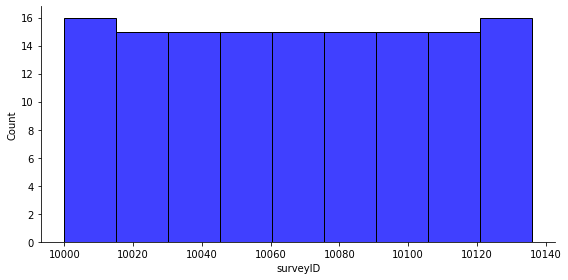

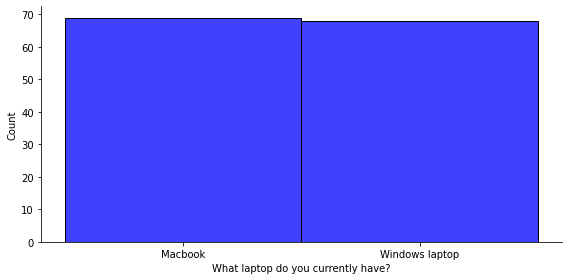

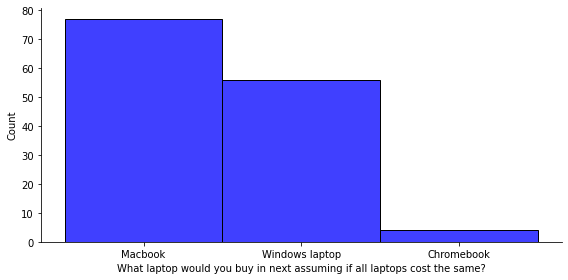

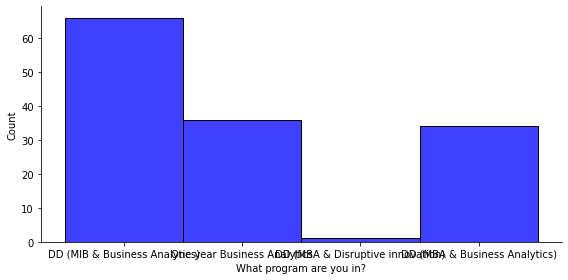

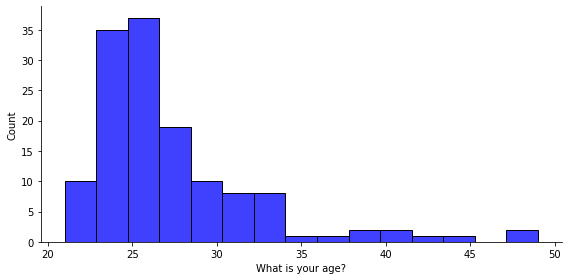

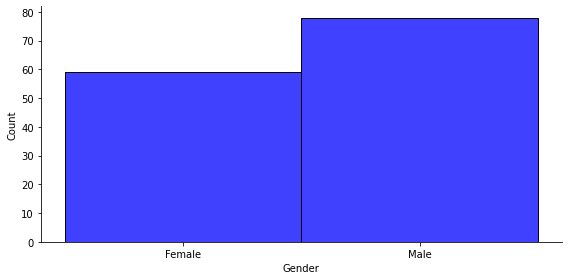

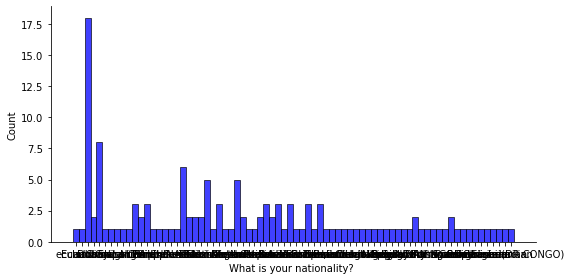

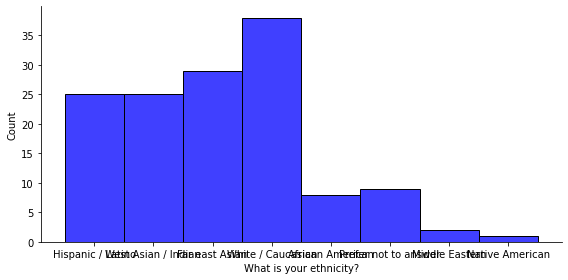

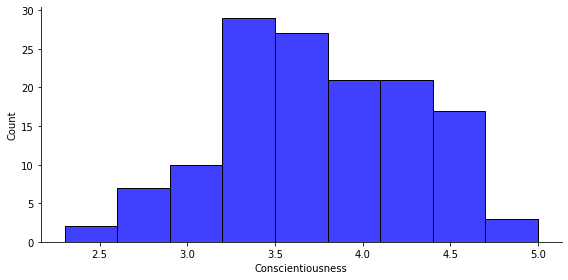

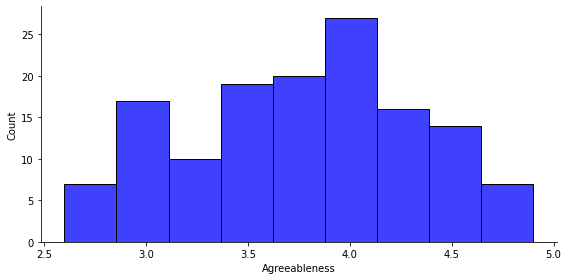

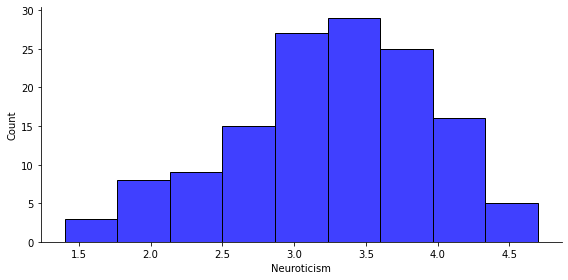

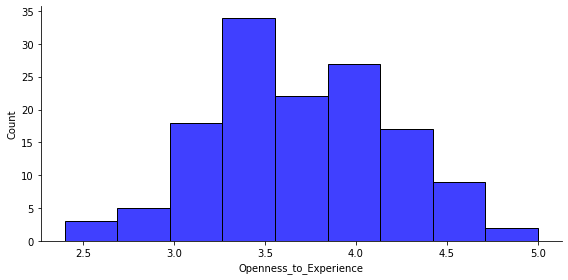

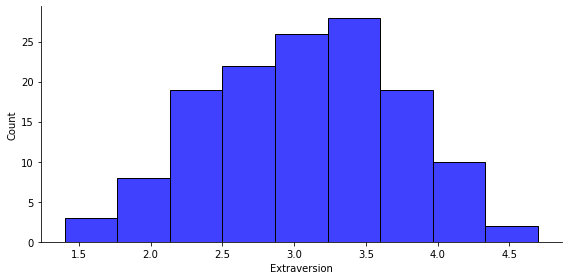

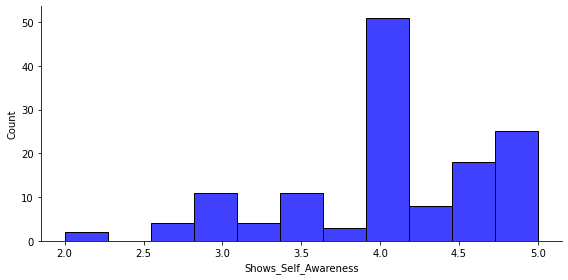

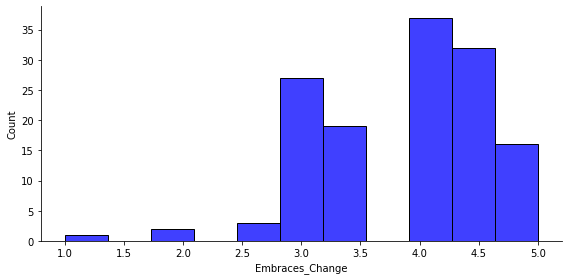

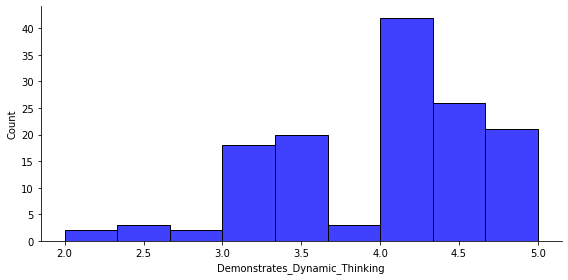

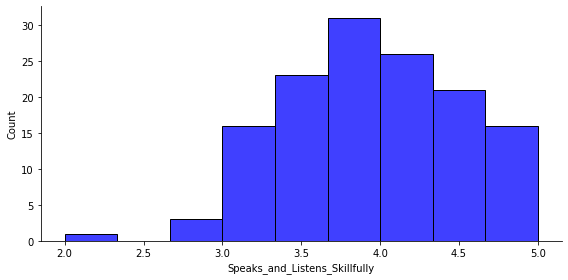

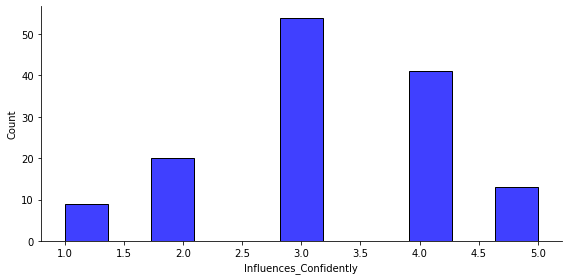

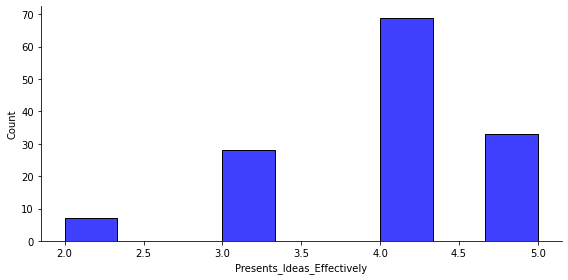

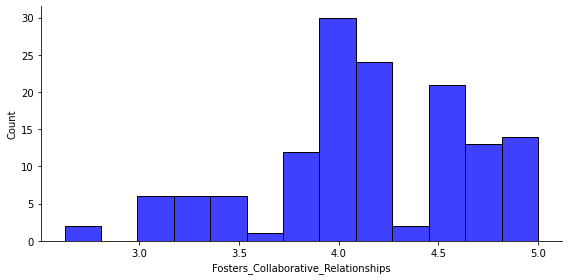

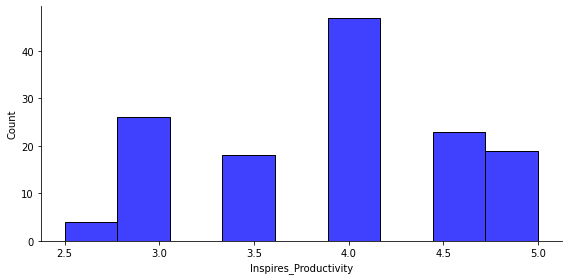

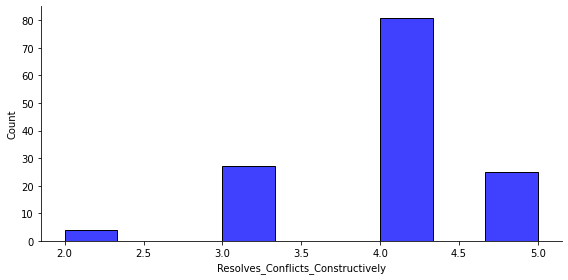

In [9]:
name_vec = survey_adj.columns

# developing displots for inspecting continuous variables
for name in name_vec :
    sns.displot(x = survey_df[name],
                data = survey_df ,
                color = 'blue',
                height = 4,
                aspect = 2 )
    plt.xlabel(xlabel = name)
    plt.ylabel(ylabel = 'Count')

plt.show()

<h2>1.5) Grouping the Age</h2>


<Figure size 1080x432 with 0 Axes>

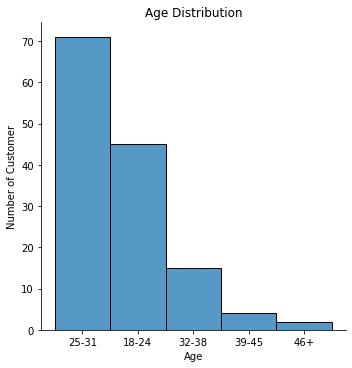

In [10]:
#Based on the above plot, we can identify a spread in the age.
#It should be noted that the survey was done on Hult students which are known for their diversity.
#This being said, such variance in age was expected.
#In order to simplify things, a new column "Age Group" was created to decrease the spread.

#  Number of Customers in different age groups:  
survey_adj['Age Group'] = 0

for index, value in survey_adj.iterrows():
    if 18 <= survey_adj.loc[index, 'What is your age?'] < 25 :
        survey_adj.loc[index,'Age Group'] = '18-24'
    elif 25 <= survey_adj.loc[index, 'What is your age?'] < 32 :
        survey_adj.loc[index,'Age Group'] = '25-31'
    elif 32 <= survey_adj.loc[index, 'What is your age?'] < 39 :
        survey_adj.loc[index,'Age Group'] = '32-38'
    elif 39 <= survey_adj.loc[index, 'What is your age?'] < 46 :
        survey_adj.loc[index,'Age Group'] = '39-45'
    elif 46 <= survey_adj.loc[index, 'What is your age?'] :
        survey_adj.loc[index,'Age Group'] = '46+'


plt.figure(figsize=(15,6))
sns.displot(x= survey_adj['Age Group'], palette="rocket")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

<h2>1.6) Nationality Grouping</h2>

Exploring the Data made us realize that answering the nationality question can be answered in several ways:
- Brazil / Brazilian
- Filipino / Philippines and so on.

We decided to group such answers to facilitate the analysis. 


In [11]:
survey_adj['Nation'] = 0


for index, value in survey_df.iterrows() :
    ## initializing a new string to append only alphabets
    only_alpha = ""
    ## looping through the string to find out alphabets
    for char in survey_adj.loc[index,'What is your nationality? ']:
    ## checking whether the char is an alphabet or not using chr.isalpha() method
        if char.isalpha():
            only_alpha += char
    
    only_alpha = only_alpha.lower()
    #print(only_alpha)
    survey_adj.loc[index,'Nation'] = only_alpha
    survey_adj.loc[index,'Nation'] = survey_adj.loc[index,'Nation'][:4]

    
#survey_adj['Nation'].value_counts()

In [12]:
for index, value in survey_adj.iterrows() :
    
    if survey_adj.loc[index,'Nation'] == 'repu' or survey_adj.loc[index,'Nation'] == 'sout'  :
        survey_adj.loc[index,'Nation'] = 'kore'
        
    elif survey_adj.loc[index,'Nation'] == 'usa' :
        survey_adj.loc[index,'Nation'] = 'amer'
    
    elif survey_adj.loc[index,'Nation'] == 'spai' :
        survey_adj.loc[index,'Nation'] = 'span'
        
    elif survey_adj.loc[index,'Nation'] == 'pref' :
        survey_adj.loc[index,'Nation'] = 'na'
        
    elif survey_adj.loc[index,'Nation'] == 'fili' :
        survey_adj.loc[index,'Nation'] = 'phil'
        
#survey_adj['Nation'].value_counts()

In [13]:
#After adjusting the nationality, we grouped them based on Regions.
north_america = ['amer','mexi','cana']
south_america = ['peru','colo','braz','ecua','domi','pana','vene','cost']
europe = ['germ','russ','ital','norw','span','czec','brit','bela','belg','ukra','port','swis','turk']
asia = ['indi','chin','kore','indo','taiw','phil','viet','thai','paki','kyrg','japa']
africa = ['nige','cong','ugan','keny','ghan','maur']

survey_adj['Region'] = 'NA'

#checking if an email is personal or professional or neither(junk)
for index, value in survey_adj.iterrows():
    
    #north america
    if any(element in survey_adj.loc[index,'Nation'] for element in north_america) :
        survey_adj.loc[index, 'Region'] = 'North_America'
        
    #south america
    elif any(element in survey_adj.loc[index,'Nation'] for element in south_america) :
        survey_adj.loc[index, 'Region'] = 'South_America'
        
    #europe
    elif any(element in survey_adj.loc[index,'Nation'] for element in europe) :
        survey_adj.loc[index, 'Region'] = 'Europe'
        
    #asia
    elif any(element in survey_adj.loc[index,'Nation'] for element in asia) :
        survey_adj.loc[index, 'Region'] = 'Asia'
        
    #africa
    elif any(element in survey_adj.loc[index,'Nation'] for element in africa) :
        survey_adj.loc[index, 'Region'] = 'Africa'
        
survey_adj['Region'].value_counts()


Asia             55
Europe           33
South_America    24
North_America    14
Africa           10
NA                1
Name: Region, dtype: int64

In [14]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = '*',
             markersize = 10,
             markeredgecolor = 'grey',
             markerfacecolor = 'black')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

<h2>2 | Building Model 1: 5 Big Personality Traits</h2>

<h2>2.1) Scaling the Data</h2>

In [15]:
# To have the same variance, our cleaned data should be scaled.
# scaling (normalizing) variables before correlation analysis

# dropping demographic information
attribute_questions = survey_adj.iloc[:,8:13]
attribute_questions.columns = ['Conscientiousness','Agreeableness','Neuroticism',
                               'Openness_to_Experience','Extraversion']

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(attribute_questions)


# TRANSFORMING our data after fit
X_scaled = scaler.fit_transform(attribute_questions)


# converting scaled data into a DataFrame
attribute_scaled = pd.DataFrame(X_scaled)


# reattaching column names
attribute_scaled.columns = attribute_questions.columns


# checking pre- and post-scaling variance
print(np.var(attribute_questions), '\n\n')
print(np.var(attribute_scaled))

Conscientiousness         0.303366
Agreeableness             0.314421
Neuroticism               0.469063
Openness_to_Experience    0.273720
Extraversion              0.430333
dtype: float64 


Conscientiousness         1.0
Agreeableness             1.0
Neuroticism               1.0
Openness_to_Experience    1.0
Extraversion              1.0
dtype: float64


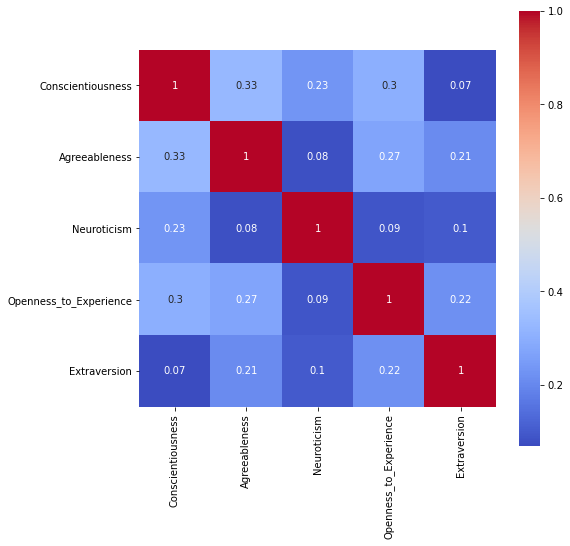

In [16]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = attribute_scaled.corr(method='pearson').round(2)


# creating a correlation heatmap
sns.heatmap(data= df_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True)


# saving and displaying the heatmap
plt.savefig('top_customers_correlation_heatmap.png')
plt.show()

<h2>2.2) PCA</h2>

In [17]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(attribute_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", X_scaled.shape)
print("PCA shape     :",  customer_pca.shape)

Original shape: (137, 5)
PCA shape     : (137, 5)


<h4>Evaluating PCA Algorithms</h4>

In [18]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.359
PC 2 : 0.197
PC 3 : 0.182
PC 4 : 0.146
PC 5 : 0.116


In [19]:
# printing the sum of all explained variance ratios

sum_of_variance = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    sum_of_variance += variance
    
print(f"PC Sum of Variances : {sum_of_variance.round(3)}")

PC Sum of Variances : 1.0


<h4>Scree Plots</h4>

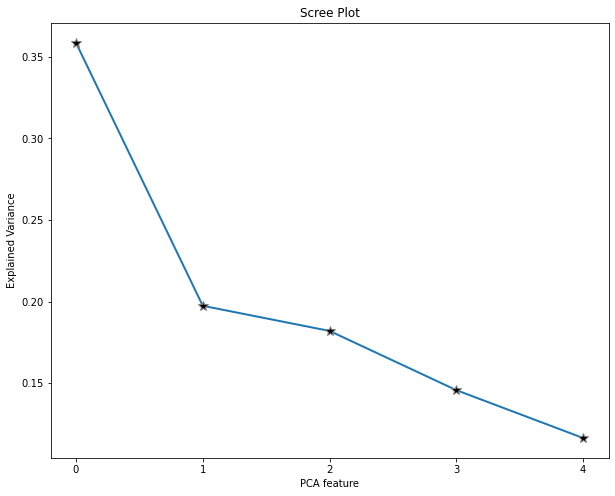

In [20]:
# calling the scree_plot function
scree_plot(pca_object = pca)

<h4>Reducing the number of principal components</h4>

In [21]:
# Based on the elbow in the above scree plot, three PCs seem to be reasonable.
# INSTANTIATING a new PCA object with optimized 3 components
pca = PCA(n_components = 3,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_pca = pca.fit_transform(attribute_scaled)

# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.359
PC 2 : 0.197
PC 3 : 0.182


<h4> Analyzing the PC factor loadings</h4>
Based on the below factor loadings, a persona for each principal component was developed.

In [22]:
# transposing pca components
factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_df = factor_loadings_df.set_index(attribute_scaled.columns)


# checking the result
print(factor_loadings_df.iloc[:,0:3])


# saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

                               0         1         2
Conscientiousness      -0.517428 -0.352309  0.364181
Agreeableness          -0.512719  0.190331  0.269625
Neuroticism            -0.302406 -0.718096 -0.547915
Openness_to_Experience -0.500647  0.232789  0.165481
Extraversion           -0.356778  0.519424 -0.683433


<ipython-input-22-e40387befcfe>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_df = pd.DataFrame(pd.np.transpose(pca.components_))


- PC 1 (variable 0) seem to have negative values for all groups. 

- PC 2 (variable 1) reflects students who are not calm and confident. 

- PC 3 (variable 2) are people friendly ,curious, like order yet  neurotic and solitary. 


In [23]:
factor_loadings_df= factor_loadings_df.iloc[:,0:3]

# naming each principal component
factor_loadings_df.columns = ['Skeptic',                 # Solitary, Extravagant, Neurotic, challenging, cautious
                              'Social , Neurotic',       # Extrovert, Extravagant, Neurotic, curious, friendly
                              'Alone, Self-aware']       # Solitary, Orderly, Neurotic, friendly , curious


# checking the result
factor_loadings_df

,Skeptic,"Social , Neurotic","Alone, Self-aware"
Conscientiousness,-0.517428,-0.352309,0.364181
Agreeableness,-0.512719,0.190331,0.269625
Neuroticism,-0.302406,-0.718096,-0.547915
Openness_to_Experience,-0.500647,0.232789,0.165481
Extraversion,-0.356778,0.519424,-0.683433


<h4>Analyzing the factor loadings for each student in the dataset</h2>

In [24]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(attribute_scaled)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_df.columns


# checking the results
#X_pca_df

<h2>2.3) Clustering</h2>

<h4>Building an agglomerative clustering model</h4>

In [25]:
#Scaling Factor Loadings

# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = factor_loadings_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Skeptic              1.792832
Social , Neurotic    0.986934
Alone, Self-aware    0.909896
dtype: float64 


Skeptic              1.0
Social , Neurotic    1.0
Alone, Self-aware    1.0
dtype: float64


<ipython-input-25-9ac90053f6cd>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-25-9ac90053f6cd>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


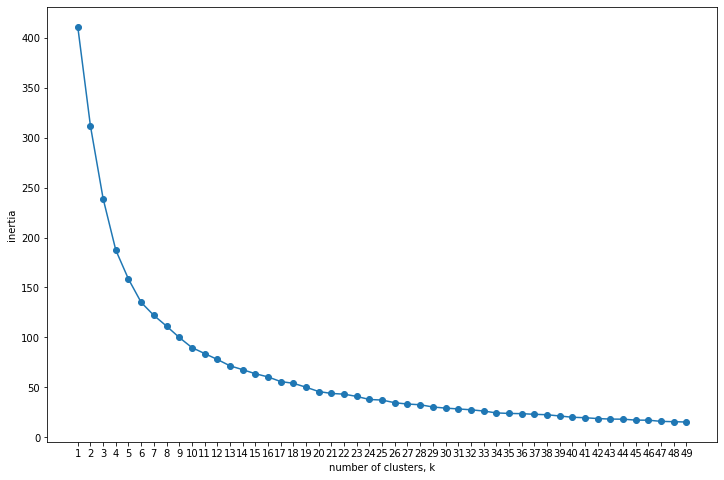

In [26]:
from sklearn.cluster import KMeans

def inertia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()
    

inertia_plot(data = pca_scaled)

Developing a k-Means model with 4 clusters.

In [27]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

1    46
3    34
0    33
2    24
Name: Cluster, dtype: int64


In [28]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = factor_loadings_df.columns


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Skeptic,"Social , Neurotic","Alone, Self-aware"
0,-0.05,-0.91,0.81
1,-0.94,0.18,-0.61
2,0.41,1.04,1.12
3,1.03,-0.09,-0.75


In [29]:
cluster = ['Orderly person' , 'Curious, not cautious' , 'Sociable' , 'Cautious, not friendly']

# Assigning cluster object 
centroids_pca_df.index = cluster
centroids_pca_df.round(2)

,Skeptic,"Social , Neurotic","Alone, Self-aware"
Orderly person,-0.05,-0.91,0.81
"Curious, not cautious",-0.94,0.18,-0.61
Sociable,0.41,1.04,1.12
"Cautious, not friendly",1.03,-0.09,-0.75


In [30]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_big5_clust = pd.concat([survey_adj.loc[ : , ['What laptop do you currently have?',
                                                     'What laptop would you buy in next assuming if all laptops cost the same?',
                                                     'What program are you in?',
                                                     'Gender',
                                                     'What is your ethnicity?',
                                                     'Age Group',
                                                     'Region']],
                                clst_pca_df],
                                axis = 1)


# checking the results
#final_big5_clust.head(n = 5)

In [31]:
# Renaming 
cluster_names = {0 : 'Orderly person',
                 1 : 'Curious, not cautious',
                 2 : 'Sociable',
                 3 : 'Cautious, not friendly'}


# Saving new cluster names
final_big5_clust['Cluster'].replace(cluster_names, inplace = True)
#final_big5_clust.head(n=5)



<h2>2.4) Analyzing Model 1 with Demographics </h2>

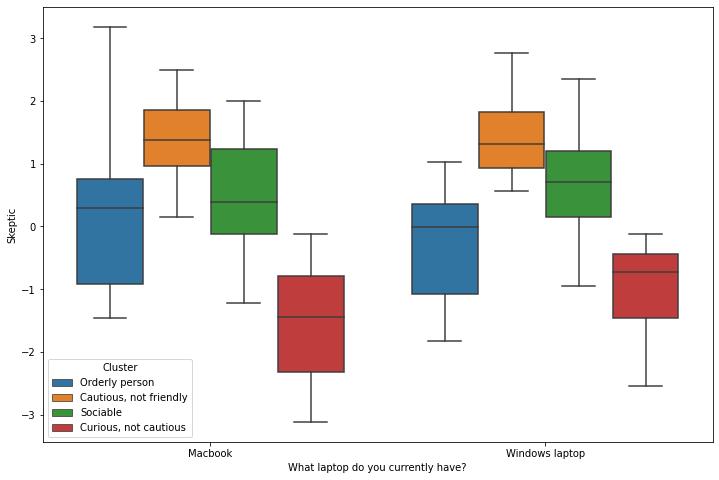

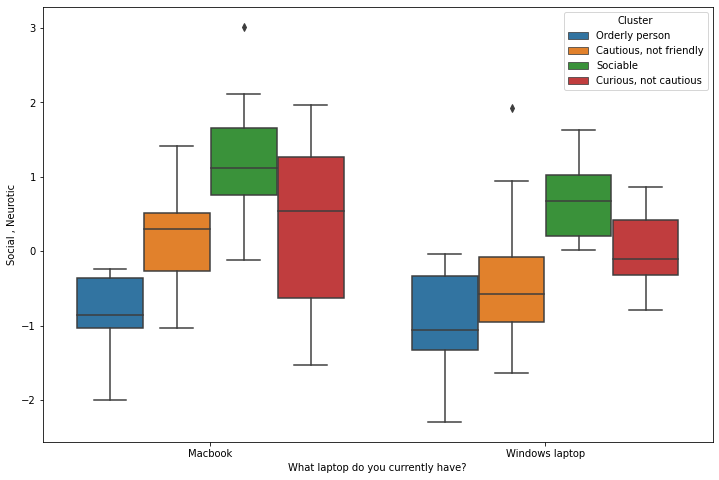

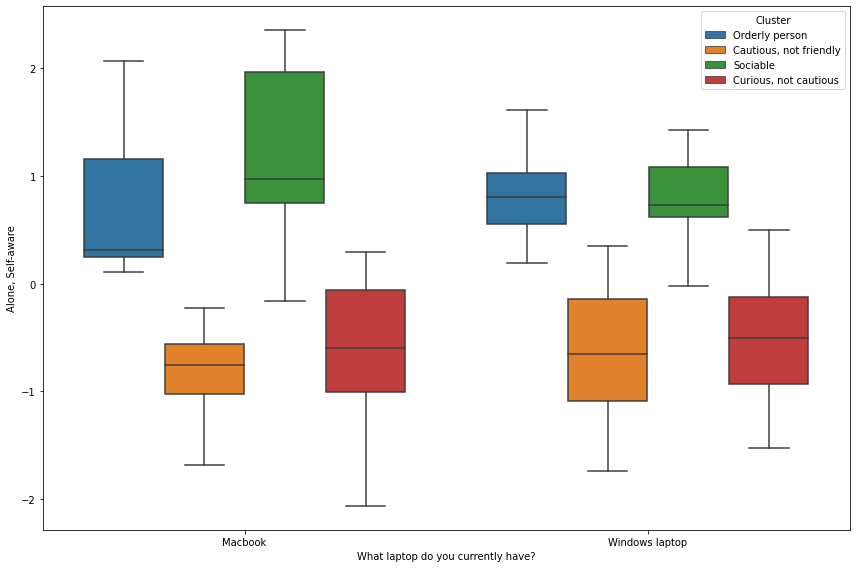

In [32]:
########################
# What laptop do you currently have?
########################

# Skeptic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Skeptic',
            hue = 'Cluster',
            data = final_big5_clust)



# Social , Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Social , Neurotic',
            hue = 'Cluster',
            data = final_big5_clust)



# Alone, Self-aware
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Alone, Self-aware',
            hue = 'Cluster',
            data = final_big5_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

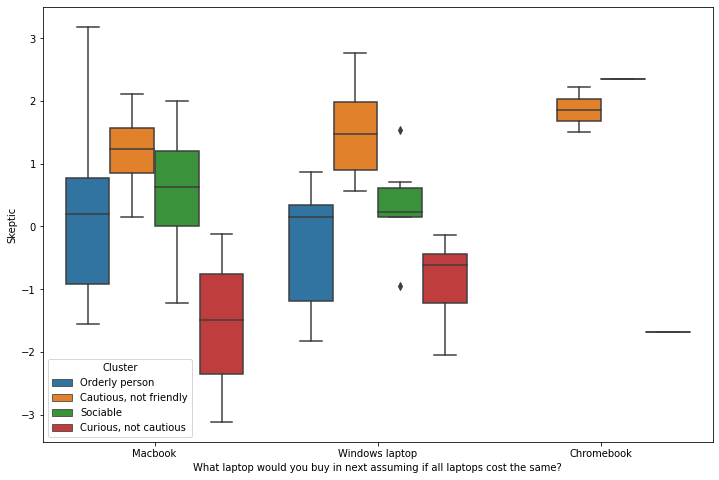

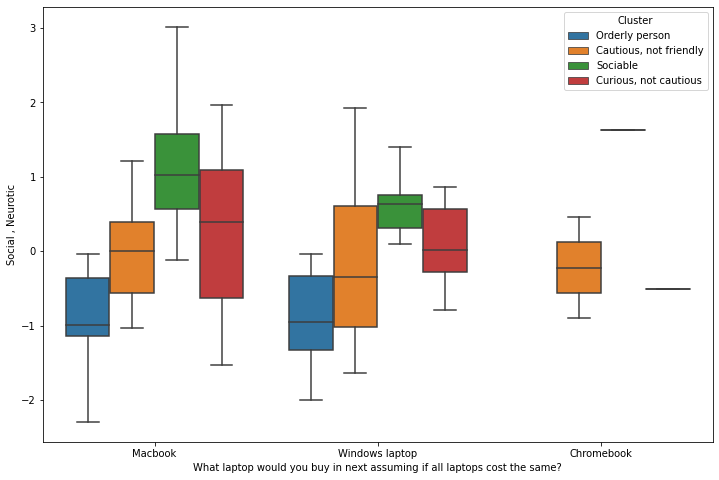

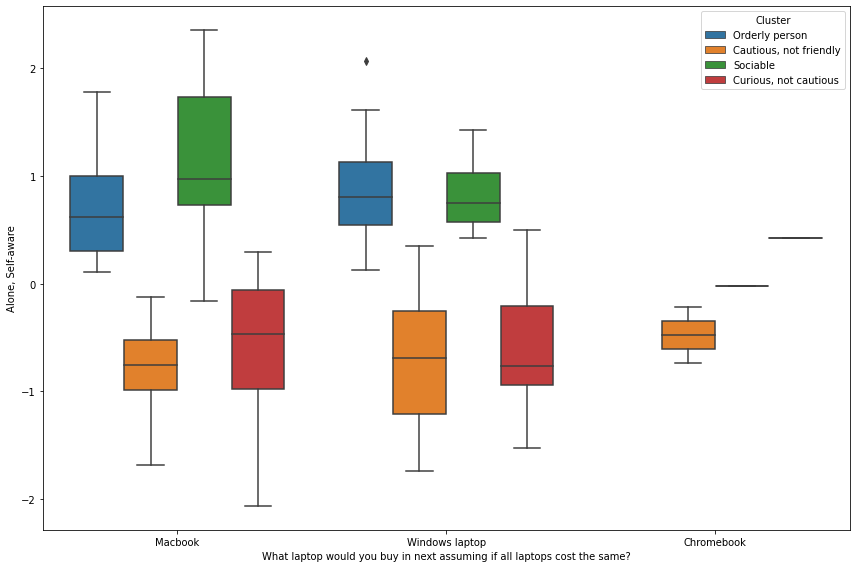

In [33]:
########################
# What laptop would you buy in next assuming if all laptops cost the same?
########################


# Skeptic

fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Skeptic',
            hue = 'Cluster',
            data = final_big5_clust)


# Social , Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Social , Neurotic',
            hue = 'Cluster',
            data = final_big5_clust)


# Alone, Self-aware
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Alone, Self-aware',
            hue = 'Cluster',
            data = final_big5_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()




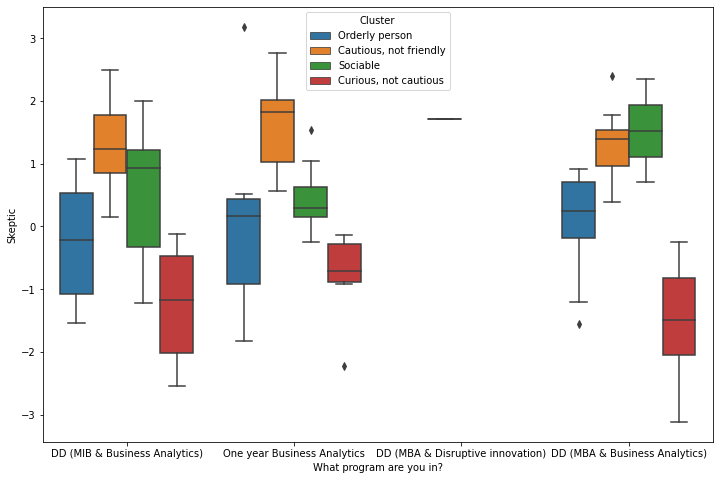

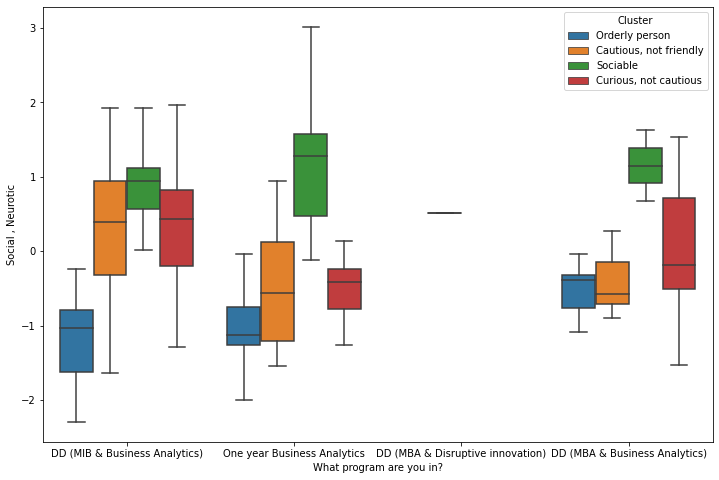

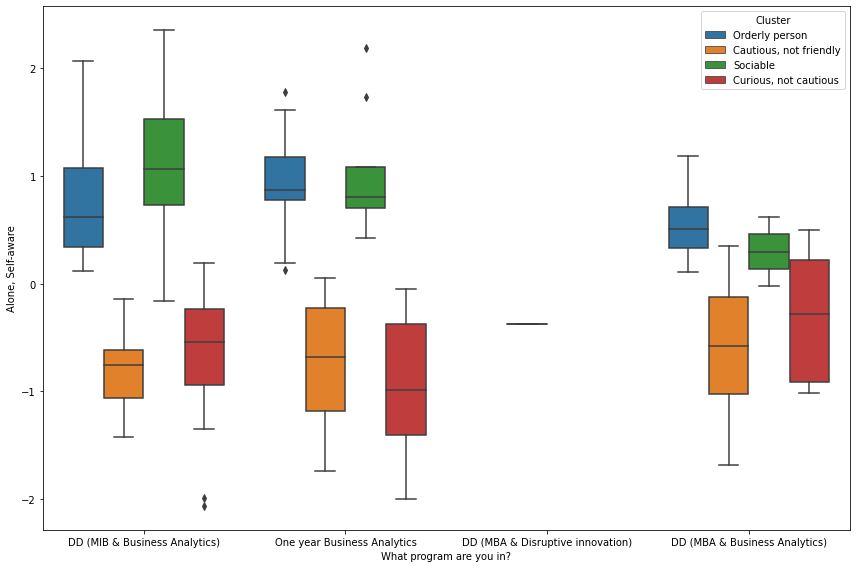

In [34]:
########################
# What program are you in?
########################

# Skeptic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'Skeptic',
            hue = 'Cluster',
            data = final_big5_clust)



# Social , Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'Social , Neurotic',
            hue = 'Cluster',
            data = final_big5_clust)



# Alone, Self-aware
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What program are you in?',
            y = 'Alone, Self-aware',
            hue = 'Cluster',
            data = final_big5_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


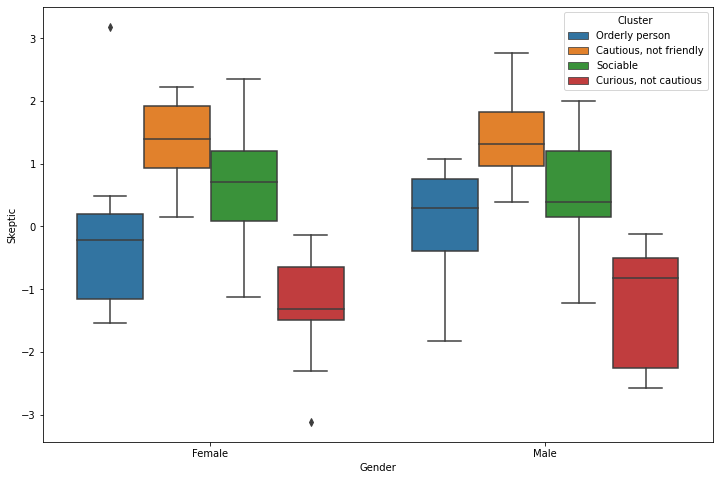

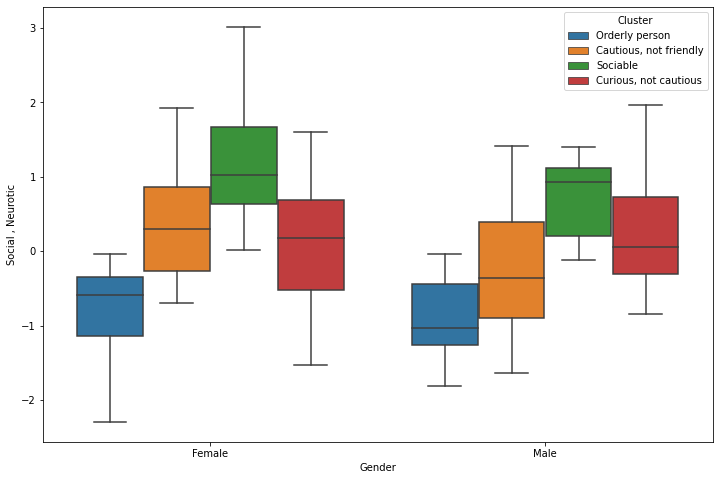

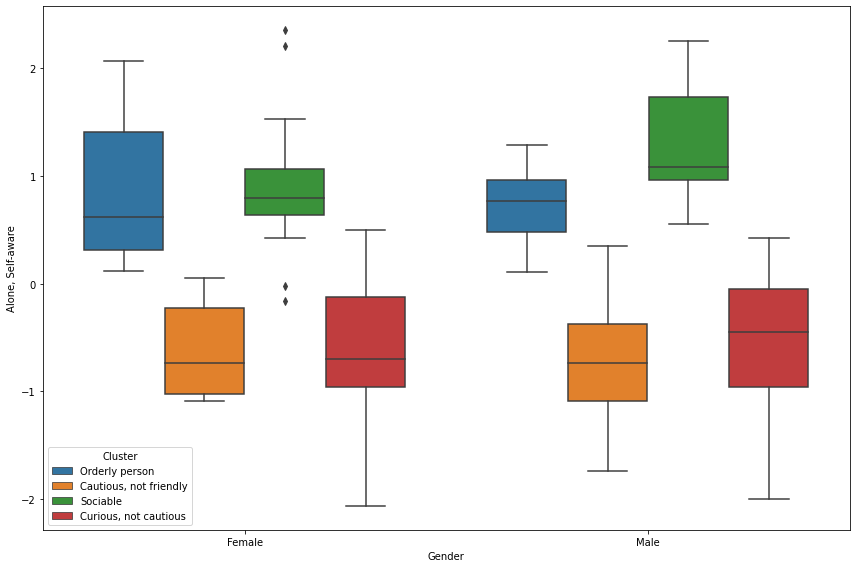

In [35]:
########################
# Gender
########################

# Skeptic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Skeptic',
            hue = 'Cluster',
            data = final_big5_clust)



# Social , Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Social , Neurotic',
            hue = 'Cluster',
            data = final_big5_clust)



# Alone, Self-aware
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Alone, Self-aware',
            hue = 'Cluster',
            data = final_big5_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


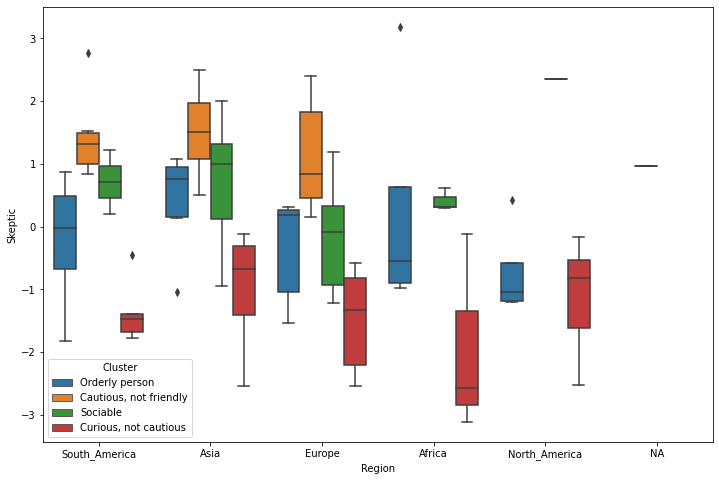

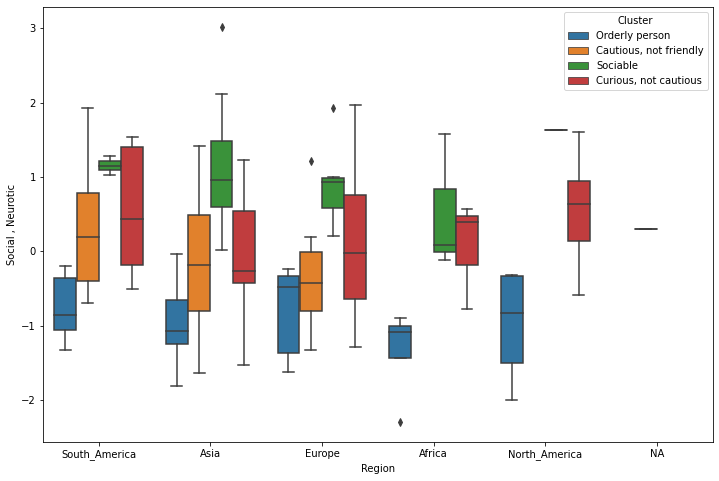

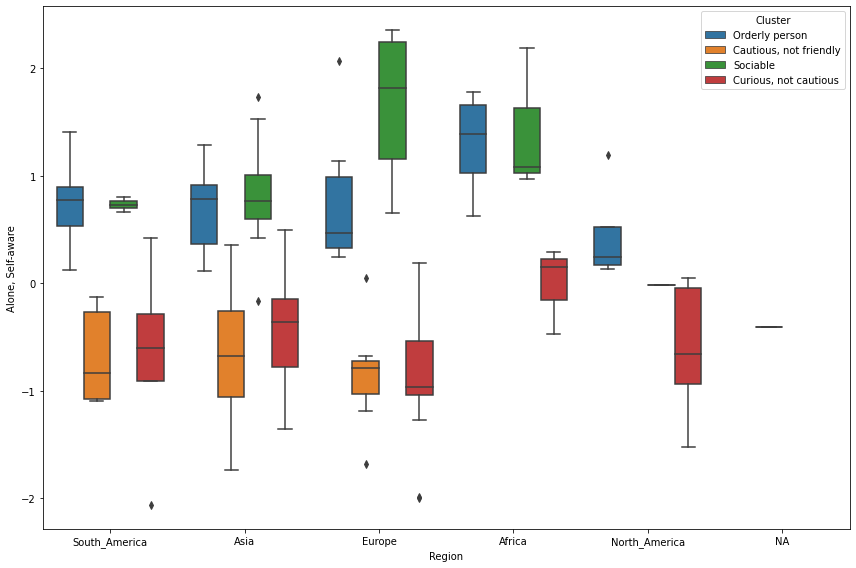

In [36]:
########################
# Region
########################

# Skeptic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Skeptic',
            hue = 'Cluster',
            data = final_big5_clust)



# Social , Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Social , Neurotic',
            hue = 'Cluster',
            data = final_big5_clust)



# Alone, Self-aware
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Alone, Self-aware',
            hue = 'Cluster',
            data = final_big5_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


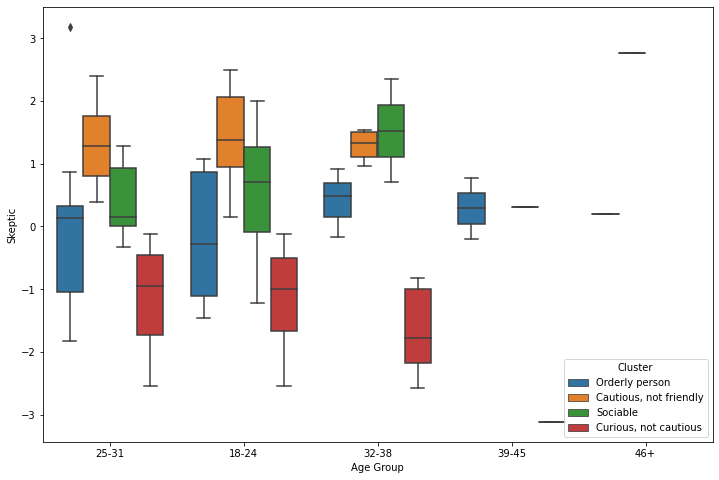

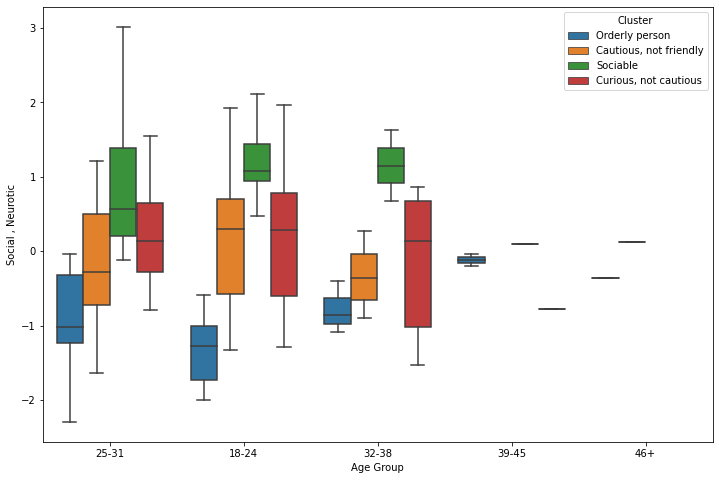

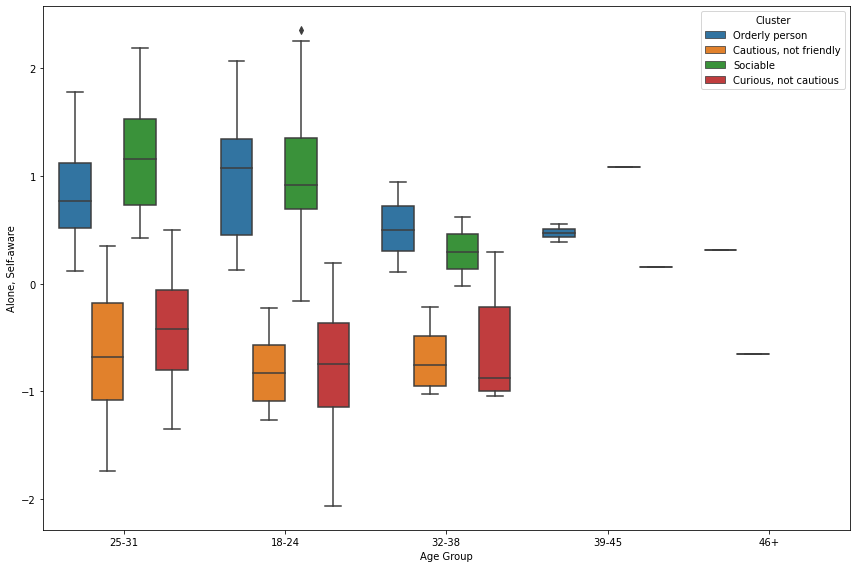

In [37]:
########################
# Age Group
########################

# Skeptic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Skeptic',
            hue = 'Cluster',
            data = final_big5_clust)



# Social , Neurotic
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Social , Neurotic',
            hue = 'Cluster',
            data = final_big5_clust)



# Alone, Self-aware
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Alone, Self-aware',
            hue = 'Cluster',
            data = final_big5_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


<h3>Analyzing Macbook (now + in the future) </h3>

In [38]:
# # Finding how much percentage of a cluster owns a Macbook

# Cluster 0 : Orderly person
cluster_0_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Orderly person')
cluster_0_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Orderly person'])
        
        
# Cluster 1 : Curious, not cautious

cluster_1_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Curious, not cautious')
cluster_1_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Curious, not cautious'])
               
            
        
# Cluster 2 : Sociable  

cluster_2_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Sociable')
cluster_2_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Sociable'])
                 
# Cluster 3: Cautious, not friendly
        
cluster_3_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Cautious, not friendly')
cluster_3_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Cautious, not friendly'])
         
        
        
print("""Finding how much percentage of a cluster owns a Macbook: 
""")        
        
print(round((cluster_0_Mac /  cluster_0_total ) * 100), "%" , "of Orderly people cluster own a Macbook")
print(round((cluster_1_Mac /  cluster_1_total ) * 100), "%" , "of Curious, not cautious cluster own a Macbook")
print(round((cluster_2_Mac /  cluster_2_total ) * 100), "%" , "of Sociable cluster own a Macbook")
print(round((cluster_3_Mac /  cluster_3_total ) * 100), "%" , "of Cautious, not friendly cluster own a Macbook")


Finding how much percentage of a cluster owns a Macbook: 

39 % of Orderly people cluster own a Macbook
52 % of Curious, not cautious cluster own a Macbook
62 % of Sociable cluster own a Macbook
50 % of Cautious, not friendly cluster own a Macbook


<ipython-input-38-67e696d39dd0>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
<ipython-input-38-67e696d39dd0>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_1_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
<ipython-input-38-67e696d39dd0>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_2_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \
<ipython-input-38-67e696d39dd0>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_3_Mac = len(final_big5_clust.loc[ : , ['What laptop do you currently have?', 'Cluster'] ] \


In [39]:
# # Finding how much percentage of a cluster will buy a Macbook

# Cluster 0 : Orderly person
#cluster_0_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Orderly person')
cluster_0_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Orderly person'])
        
        
# Cluster 1 : Curious, not cautious

#cluster_1_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Curious, not cautious')
cluster_1_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Curious, not cautious'])
               
            
        
# Cluster 2 : Sociable  

#cluster_2_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Sociable')
cluster_2_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Sociable'])
                 
# Cluster 3: Cautious, not friendly
        
#cluster_3_total = sum(final_big5_clust.loc[ : , 'Cluster'] == 'Cautious, not friendly')
cluster_3_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'] \
                    [final_big5_clust.loc[ : , 'Cluster'] == 'Cautious, not friendly'])
         
        
        
print("""Finding how much percentage of a cluster will buy Macbook: 
""")        
        
print(round((cluster_0_willMac /  cluster_0_total ) * 100), "%" , "of Orderly people cluster will buy a Macbook")
print(round((cluster_1_willMac /  cluster_1_total ) * 100), "%" , "of Curious, not cautious cluster will buy a Macbook")
print(round((cluster_2_willMac /  cluster_2_total ) * 100), "%" , "of Sociable cluster will buy a Macbook")
print(round((cluster_3_willMac /  cluster_3_total ) * 100), "%" , "of Cautious, not friendly cluster will buy a Macbook")



Finding how much percentage of a cluster will buy Macbook: 

52 % of Orderly people cluster will buy a Macbook
59 % of Curious, not cautious cluster will buy a Macbook
71 % of Sociable cluster will buy a Macbook
47 % of Cautious, not friendly cluster will buy a Macbook


<ipython-input-39-679b70116909>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_0_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
<ipython-input-39-679b70116909>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_1_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
<ipython-input-39-679b70116909>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_2_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the same?', 'Cluster'] ] \
<ipython-input-39-679b70116909>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cluster_3_willMac = len(final_big5_clust.loc[ : , ['What laptop would you buy in next assuming if all laptops cost the 

In [40]:
# creating a table
analysis_table = {
    
    'Cluster Name'    : ['Orderly people', 'Curious, not cautious', 'Sociable' , 'Cautious, not friendly' , 'Sum'],
           
    'Macbook current laptop' : [cluster_0_Mac, cluster_1_Mac, cluster_2_Mac , cluster_3_Mac,
                               cluster_0_Mac+cluster_1_Mac+cluster_2_Mac+cluster_3_Mac],
    
    'Macbook next laptop' : [cluster_0_willMac, cluster_1_willMac, cluster_2_willMac, cluster_3_willMac,
                            cluster_0_willMac+cluster_1_willMac+cluster_2_willMac+cluster_3_willMac,]}


# converting analysis_table into a DataFrame
analysis_table = pd.DataFrame(analysis_table)
analysis_table

,Cluster Name,Macbook current laptop,Macbook next laptop
0,Orderly people,13,17
1,"Curious, not cautious",24,27
2,Sociable,15,17
3,"Cautious, not friendly",17,16
4,Sum,69,77


<h3>Analyzing Macbook based on Program </h3>

In [41]:
##### DD (MBA & Business Analytics)

# Current Mac user
MBA_MBAN_mac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'DD (MBA & Business Analytics)'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])


# Buy Mac next time
MBA_MBAN_willmac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'DD (MBA & Business Analytics)'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])



##### DD (MBA & Disruptive innovation)

# Current Mac user
MBA_Disr_mac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'DD (MBA & Disruptive innovation)'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])



# Buy Mac next time
MBA_Disr_willmac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'DD (MBA & Disruptive innovation)'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])





#### DD (MIB & Business Analytics)

# Current Mac user
MIB_MBAN_mac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'DD (MIB & Business Analytics)'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])



# Buy Mac next time
MIB_MBAN_willmac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'DD (MIB & Business Analytics)'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])




# One year Business Analytics

# Current Mac user
MBAN_mac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'One year Business Analytics'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])

# Buy Mac next time
MBAN_willmac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'What program are you in?'] == 'One year Business Analytics'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])




# creating a table
analysis_table2 = {
    
    'Program'    : ['DD (MBA & Business Analytics)', 'DD (MBA & Disruptive innovation)' , 
                   'DD (MIB & Business Analytics)', 'DD (MBA & Disruptive innovation)'],
           
    'Macbook current laptop' : [MBA_MBAN_mac,MBA_Disr_mac,MIB_MBAN_mac,MBAN_mac ],
    
    'Macbook next laptop' : [MBA_MBAN_willmac, MBA_Disr_willmac, MIB_MBAN_willmac,MBAN_willmac  ]}



# converting analysis_table into a DataFrame
analysis_table2 = pd.DataFrame(analysis_table2)
analysis_table2

<ipython-input-41-1445a52f5494>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MBA_MBAN_mac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop do you currently have?'] ] \
<ipython-input-41-1445a52f5494>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MBA_MBAN_willmac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
<ipython-input-41-1445a52f5494>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MBA_Disr_mac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop do you currently have?'] ] \
<ipython-input-41-1445a52f5494>:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MBA_Disr_willmac = len(final_big5_clust.loc[ : , ['What program are you in?', 'What laptop would you buy in next assuming if all laptops cost the same?'] ]

,Program,Macbook current laptop,Macbook next laptop
0,DD (MBA & Business Analytics),12,17
1,DD (MBA & Disruptive innovation),1,0
2,DD (MIB & Business Analytics),41,46
3,DD (MBA & Disruptive innovation),15,14


The above table confirms the findings of the previous table.
Only 1 DD disruptive innovation student was surveyed. 

<h4> Analyzing Macbook based on Region </h4>

In [42]:
##### Region


## Asia

# Current Mac user
Asia_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'Asia'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])


# Buy Mac next time
Asia_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'Asia'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])



##### Europe 

# Current Mac user
Europe_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'Europe'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])



# Buy Mac next time
Europe_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'Europe'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])





#### South_America

# Current Mac user
SAmerica_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'South_America'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])



# Buy Mac next time
SAmerica_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'South_America'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])




# North_America

# Current Mac user
NAmerica_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'North_America'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])

# Buy Mac next time
NAmerica_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'North_America'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])


# Africa 

# Current Mac user
Africa_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'Africa '] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])

# Buy Mac next time
Africa_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Region'] == 'Africa'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])




# creating a table
analysis_table3 = {
    
    'Program'    : ['Asia', 'Europe','South_America', 'North_America','Africa'],
           
    'Macbook current laptop' : [Asia_mac,Europe_mac,SAmerica_mac,NAmerica_mac,Africa_mac],
    
    'Macbook next laptop' : [Asia_willmac,Europe_willmac,SAmerica_willmac,NAmerica_willmac,Africa_willmac]}



# converting analysis_table into a DataFrame
analysis_table3 = pd.DataFrame(analysis_table3)
analysis_table3

<ipython-input-42-9bb7a43424a4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Asia_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
<ipython-input-42-9bb7a43424a4>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Asia_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
<ipython-input-42-9bb7a43424a4>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Europe_mac = len(final_big5_clust.loc[ : , ['Region', 'What laptop do you currently have?'] ] \
<ipython-input-42-9bb7a43424a4>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Europe_willmac = len(final_big5_clust.loc[ : , ['Region', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
<ipython-input-42-9bb7a43424a4>:40: UserWarning: Boolean Series key will be reind

,Program,Macbook current laptop,Macbook next laptop
0,Asia,26,30
1,Europe,22,21
2,South_America,7,11
3,North_America,7,6
4,Africa,0,8


<h4> Analyzing Macbook based on Gender </h4>

In [43]:
##### Gender


## Male

# Current Mac user
male_mac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Gender'] == 'Male'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])


# Buy Mac next time
male_willmac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Gender'] == 'Male'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])



##### Female 

# Current Mac user
female_mac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop do you currently have?'] ] \
                    [final_big5_clust.loc[ : , 'Gender'] == 'Female'] \
                    [final_big5_clust.loc[ : , 'What laptop do you currently have?'] == 'Macbook'])



# Buy Mac next time
female_willmac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
                    [final_big5_clust.loc[ : , 'Gender'] == 'Female'] \
                    [final_big5_clust.loc[ : , 'What laptop would you buy in next assuming if all laptops cost the same?'] == 'Macbook'])







# creating a table
analysis_table3 = {
    
    'Program'    : ['Female', 'Male'],
           
    'Macbook current laptop' : [female_mac,male_mac],
    
    'Macbook next laptop' : [female_willmac,male_willmac]}



# converting analysis_table into a DataFrame
analysis_table3 = pd.DataFrame(analysis_table3)
analysis_table3

<ipython-input-43-2a4c21b5a7f0>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_mac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop do you currently have?'] ] \
<ipython-input-43-2a4c21b5a7f0>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_willmac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \
<ipython-input-43-2a4c21b5a7f0>:22: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_mac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop do you currently have?'] ] \
<ipython-input-43-2a4c21b5a7f0>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_willmac = len(final_big5_clust.loc[ : , ['Gender', 'What laptop would you buy in next assuming if all laptops cost the same?'] ] \


,Program,Macbook current laptop,Macbook next laptop
0,Female,36,37
1,Male,33,40


In [44]:
final_big5_clust['Gender'].value_counts()

Male      78
Female    59
Name: Gender, dtype: int64

<h1>Conclusion of Model 1: Big 5 Personality Traits</h1>


We first ran an analysis to understand how many of the 137 surveyed student have a Macbook. As a result, we found that 69 (50.4% of the total number of students) currently have a Mac. This number will reach 77 after all surveyed students change their laptops. This being said, Apple should expect around 10% increase in its sales. It should be noted that this percentage reflects people changing from Windows to Mac. Among all students, it seems like sociable ones (students that have the big 5 personality traits) tend to buy Apple laptops the most. This is related to the fact that macbooks are user-friendly and very light to move around with, not to mention that a sociable person tend to like the idea of buying covers to change style from time to time. 



After analyzing the choice of laptop among the different regions, two main conclusions can be highlighted:
1) Overall, the highest percentage of students owning a Macbook is for the Europeans. Among all Hult European students, 67% own a Mac. <br>
2) South Americans favorite the use of Microsoft laptops. This may be related to the fact that microsoft laptops are cheaper than Macbooks. 

Even-though Apple is an American multinational brand,we noticed that only 36.8% of students coming from North America and South America own a Mac. This percentage is expected to increase and reach around 45% since some students are willing to switch in their next purchase. 

In fact, we noticed around 18.5% increase in Mac users in the next laptop purchase. This increase comes mainly from African students.


By focusing on the gender type we concluded that 61% of the surveyed females own a Macbook now, compared to males with 42% using a Mac nowadays. However, males are Mac oriented in their future purchase (17.5% increase was identified). 




# Recommendations:


One of the most important things that an International student must have, is owning a laptop. 
In addition, the US has always seen high number of international students , even during hard times such as in 2020. This being said, focusing on such type of students will increase Apple's sales. 

It was highlighted that all 5 types of student use Macbooks, whether females or males and regardless of which degree they are in. Apple should focus on marketing to males and females who are social distant introverts but show positive attitude by using platforms such as social media, blogs and forums that avoid interactions which may make them feel uncomfortable.


African students might be a good customer to target Apple's campaign on.They showed a big concern in switching from Microsoft to Mac. As for the Europeans, apple should remain operating and marketing in the same way; keeping its customers happy and interested. 

<h2>3 | Building Model 2: Hult DNA</h2>

<h2>3.1) Scaling the Data</h2>

In [45]:
# scaling (normalizing) variables before correlation analysis

# dropping demographic information
attribute_questions_hult = survey_adj.iloc[:,13:22]
attribute_questions_hult.columns = ['Shows_Self_Awareness','Embraces_Change','Demonstrates_Dynamic_Thinking',
                               'Speaks_and_Listens_Skillfully','Influences_Confidently','Presents_Ideas_Effectively',
                               'Fosters_Collaborative_Relationships','Inspires_Productivity','Resolves_Conflicts_Constructively']

# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(attribute_questions_hult)


# TRANSFORMING our data after fit
X_hult_scaled = scaler.fit_transform(attribute_questions_hult)


# converting scaled data into a DataFrame
attribute_scaled_hult = pd.DataFrame(X_hult_scaled)


# reattaching column names
attribute_scaled_hult.columns = attribute_questions_hult.columns


# checking pre- and post-scaling variance
print(np.var(attribute_questions_hult), '\n\n')
print(np.var(attribute_scaled_hult))

Shows_Self_Awareness                   0.416578
Embraces_Change                        0.566652
Demonstrates_Dynamic_Thinking          0.479447
Speaks_and_Listens_Skillfully          0.320967
Influences_Confidently                 1.042783
Presents_Ideas_Effectively             0.645319
Fosters_Collaborative_Relationships    0.293289
Inspires_Productivity                  0.463104
Resolves_Conflicts_Constructively      0.491022
dtype: float64 


Shows_Self_Awareness                   1.0
Embraces_Change                        1.0
Demonstrates_Dynamic_Thinking          1.0
Speaks_and_Listens_Skillfully          1.0
Influences_Confidently                 1.0
Presents_Ideas_Effectively             1.0
Fosters_Collaborative_Relationships    1.0
Inspires_Productivity                  1.0
Resolves_Conflicts_Constructively      1.0
dtype: float64


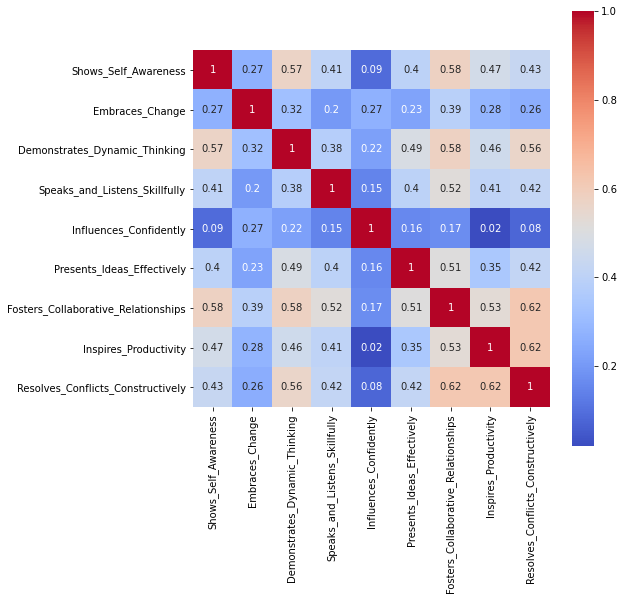

In [46]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_hult_corr = attribute_scaled_hult.corr(method='pearson').round(2)


# creating a correlation heatmap
sns.heatmap(data= df_hult_corr,
            cmap = 'coolwarm',
            square = True,
            annot = True)


# saving and displaying the heatmap
#plt.savefig('top_customers_correlation_heatmap.png')
plt.show()

<h2>3.2) PCA</h2>

In [47]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_hult_pca = pca.fit_transform(attribute_scaled_hult)


# comparing dimensions of each DataFrame
print("Original shape:", X_hult_scaled.shape)
print("PCA shape     :",  customer_hult_pca.shape)

Original shape: (137, 9)
PCA shape     : (137, 9)


In [48]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number} : {variance.round(3)}")

PC 1 : 0.46
PC 2 : 0.125
PC 3 : 0.086
PC 4 : 0.073
PC 5 : 0.069
PC 6 : 0.066
PC 7 : 0.048
PC 8 : 0.041
PC 9 : 0.032


In [49]:
# printing the sum of all explained variance ratios

sum_of_variance = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    sum_of_variance += variance
    
print(f"PC Sum of Variances : {sum_of_variance.round(3)}")

PC Sum of Variances : 1.0


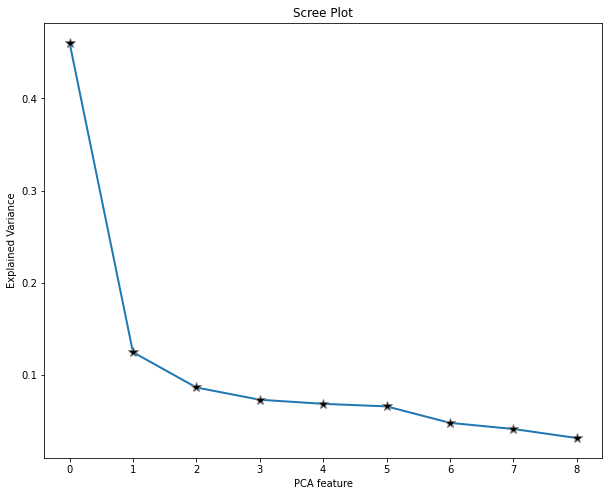

In [50]:
# calling the scree_plot function
scree_plot(pca_object = pca)

<h4>Reducing the number of principal components</h4>

five PCs seem to be reasonable.

In [51]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 5,
            random_state = 802)


# FITTING and TRANSFORMING the scaled data
customer_hult_pca = pca.fit_transform(attribute_scaled_hult)

# printing the sum of all explained variance ratios

sum_of_variance = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    sum_of_variance += variance
    
print(f"PC Sum of Variances : {sum_of_variance.round(3)}")

PC Sum of Variances : 0.813


In [52]:
# transposing pca components
factor_loadings_hult_df = pd.DataFrame(pd.np.transpose(pca.components_))


# naming rows as original features
factor_loadings_hult_df = factor_loadings_hult_df.set_index(attribute_scaled_hult.columns)


# checking the result
print(factor_loadings_hult_df.iloc[:,0:5])


# saving to Excel
#factor_loadings_df.to_excel('customer_factor_loadings.xlsx')

                                            0         1         2         3         4
Shows_Self_Awareness                -0.358392  0.115738 -0.019320  0.325107  0.124661
Embraces_Change                     -0.240879 -0.478301 -0.677005  0.008516  0.437383
Demonstrates_Dynamic_Thinking       -0.384208 -0.044978  0.045064  0.393836 -0.264878
Speaks_and_Listens_Skillfully       -0.320520  0.065779  0.419706 -0.596740  0.491168
Influences_Confidently              -0.123978 -0.798799  0.294964 -0.203345 -0.397809
Presents_Ideas_Effectively          -0.326955 -0.026899  0.425131  0.443377  0.221693
Fosters_Collaborative_Relationships -0.414387  0.015333 -0.030159 -0.021321  0.084232
Inspires_Productivity               -0.354627  0.267774 -0.284528 -0.326916 -0.278938
Resolves_Conflicts_Constructively   -0.378730  0.201845 -0.116195 -0.194335 -0.435256


<ipython-input-52-adcddef425d4>:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  factor_loadings_hult_df = pd.DataFrame(pd.np.transpose(pca.components_))


- PC 1 (variable 0)  doesn't follow Hult DNA. 
- PC 2 (variable 1)  no influence on others and don't tolerate change. 
- PC 3 (variable 2)  high interpersonal skills but don't embrace change.
- PC 4 (variable 3)  self-aware , good thinkers and presenters yet they have poor communication skills.
- PC 5 (variable 4)  embrace change and communicate well but don't know how to influence and resolve conflicts.

In [53]:
# naming each principal component
factor_loadings_hult_df = factor_loadings_hult_df.iloc[:,0:5]

factor_loadings_hult_df.columns = ['Socially Challenged',            # all negative, all areas open to improvement
                                  'Traditionalist, Passive',         # low change-adaption, low influencing
                                  'Traditionalist, Communicator',    # low change-adaption, high interpersonal skills 
                                  'Thinker, Speaker',                # self-aware, thinker , poor communication , good presenter
                                  'Adaptable, Teamplayer']           # embraces change, good communication, poor influence, not able to resolve conflict


# checking the result
factor_loadings_hult_df

,Socially Challenged,"Traditionalist, Passive","Traditionalist, Communicator","Thinker, Speaker","Adaptable, Teamplayer"
Shows_Self_Awareness,-0.358392,0.115738,-0.019320,0.325107,0.124661
Embraces_Change,-0.240879,-0.478301,-0.677005,0.008516,0.437383
Demonstrates_Dynamic_Thinking,-0.384208,-0.044978,0.045064,0.393836,-0.264878
Speaks_and_Listens_Skillfully,-0.320520,0.065779,0.419706,-0.596740,0.491168
Influences_Confidently,-0.123978,-0.798799,0.294964,-0.203345,-0.397809
Presents_Ideas_Effectively,-0.326955,-0.026899,0.425131,0.443377,0.221693
Fosters_Collaborative_Relationships,-0.414387,0.015333,-0.030159,-0.021321,0.084232
Inspires_Productivity,-0.354627,0.267774,-0.284528,-0.326916,-0.278938
Resolves_Conflicts_Constructively,-0.378730,0.201845,-0.116195,-0.194335,-0.435256


In [54]:
# analyzing factor strengths per customer
X_pca_reduced = pca.transform(attribute_scaled_hult)


# converting to a DataFrame
X_pca_df = pd.DataFrame(X_pca_reduced)


# renaming columns
X_pca_df.columns = factor_loadings_hult_df.columns


# checking the results
X_pca_df

,Socially Challenged,"Traditionalist, Passive","Traditionalist, Communicator","Thinker, Speaker","Adaptable, Teamplayer"
0,-0.107019,0.151572,-0.007373,-0.202837,0.234463
1,-0.757142,-0.359853,-0.576403,-0.472561,-1.721892
2,2.190553,-1.051583,1.120327,0.638917,1.645650
3,-0.869361,0.820534,-1.418012,-1.459042,-1.197534
4,3.404548,0.883935,0.147608,0.358647,0.466526
5,2.088121,0.569208,-0.896292,-0.443763,0.697142
6,-0.762689,-0.514421,0.063645,0.450094,-0.488645
7,-0.702609,0.156789,0.768786,-0.002007,0.799423
8,0.490411,0.819445,0.859447,-0.498540,-0.155304
9,-1.835694,-0.947024,-1.099116,0.488665,0.011647


<h2>3.3) Clustering</h2>

In [55]:
#Scaling Factor Loadings

# FITTING the scaler with the data
scaler.fit(X_pca_df)


# TRANSFORMING our data after fit
X_scaled_pca = scaler.transform(X_pca_df)


# converting scaled data into a DataFrame
pca_scaled = pd.DataFrame(X_scaled_pca)


# reattaching column names
pca_scaled.columns = factor_loadings_hult_df.columns


# checking pre- and post-scaling variance
print(pd.np.var(X_pca_df), '\n\n')
print(pd.np.var(pca_scaled))

Socially Challenged             4.143897
Traditionalist, Passive         1.122085
Traditionalist, Communicator    0.777365
Thinker, Speaker                0.657845
Adaptable, Teamplayer           0.617838
dtype: float64 


Socially Challenged             1.0
Traditionalist, Passive         1.0
Traditionalist, Communicator    1.0
Thinker, Speaker                1.0
Adaptable, Teamplayer           1.0
dtype: float64


<ipython-input-55-7079a36ec854>:20: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(X_pca_df), '\n\n')
<ipython-input-55-7079a36ec854>:21: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  print(pd.np.var(pca_scaled))


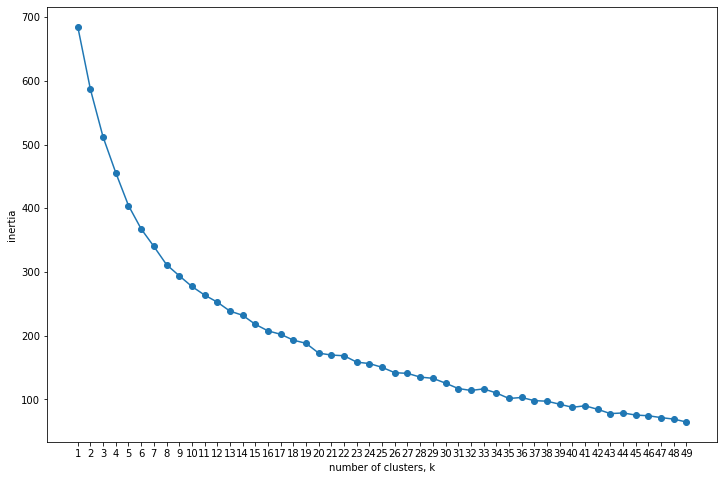

In [56]:
inertia_plot(data = pca_scaled)

In [57]:
# INSTANTIATING a k-Means object with clusters
customers_k_pca = KMeans(n_clusters   = 4,
                         random_state = 219)


# fitting the object to the data
customers_k_pca.fit(pca_scaled)


# converting the clusters to a DataFrame
customers_kmeans_pca = pd.DataFrame({'Cluster': customers_k_pca.labels_})


# checking the results
print(customers_kmeans_pca.iloc[: , 0].value_counts())

2    42
1    42
3    29
0    24
Name: Cluster, dtype: int64


In [58]:
# storing cluster centers
centroids_pca = customers_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = factor_loadings_hult_df.columns


# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Socially Challenged,"Traditionalist, Passive","Traditionalist, Communicator","Thinker, Speaker","Adaptable, Teamplayer"
0,-1.02,-0.84,0.58,-0.19,0.49
1,0.82,0.24,0.80,0.08,-0.34
2,0.04,0.45,-0.68,-0.54,0.59
3,-0.41,-0.31,-0.65,0.82,-0.77


In [59]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([customers_kmeans_pca,
                         X_pca_df],
                         axis = 1)


# checking results
clst_pca_df


# concatenating demographic information with pca-clusters
final_hult_clust = pd.concat([survey_adj.loc[ : , ['What laptop do you currently have?',
                                                     'What laptop would you buy in next assuming if all laptops cost the same?',
                                                     'What program are you in?',
                                                     'Gender',
                                                     'What is your ethnicity?',
                                                     'Age Group',
                                                     'Region']],
                                clst_pca_df],
                                axis = 1)


# checking the results
#final_hult_clust.head(n = 5)

<h2>3.4) Analyzing Model 2 with Demographics </h2>

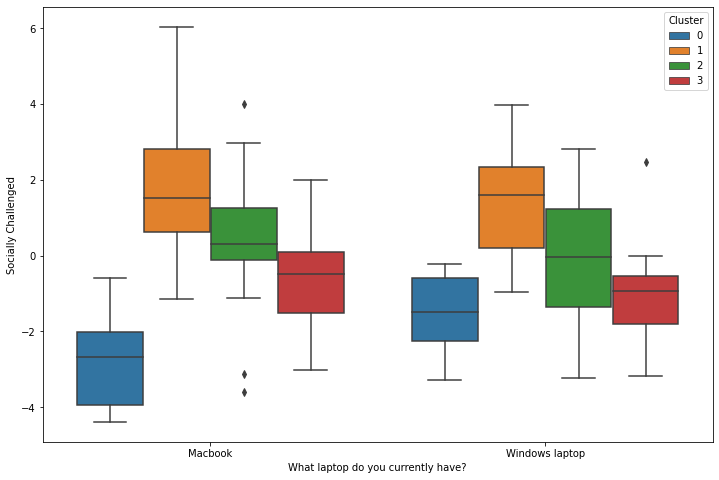

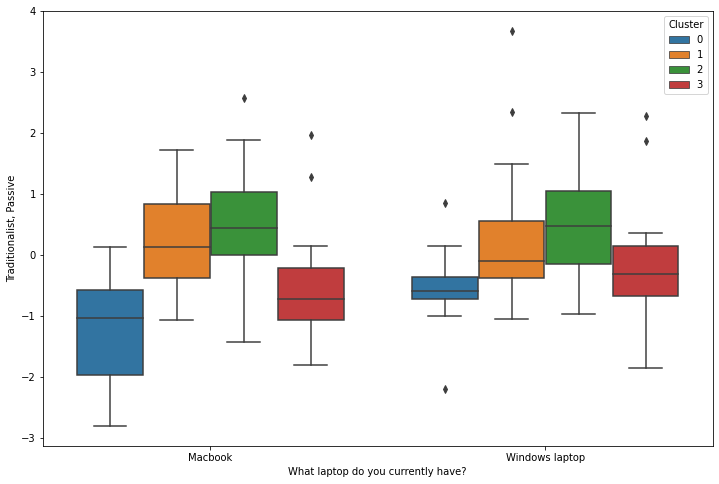

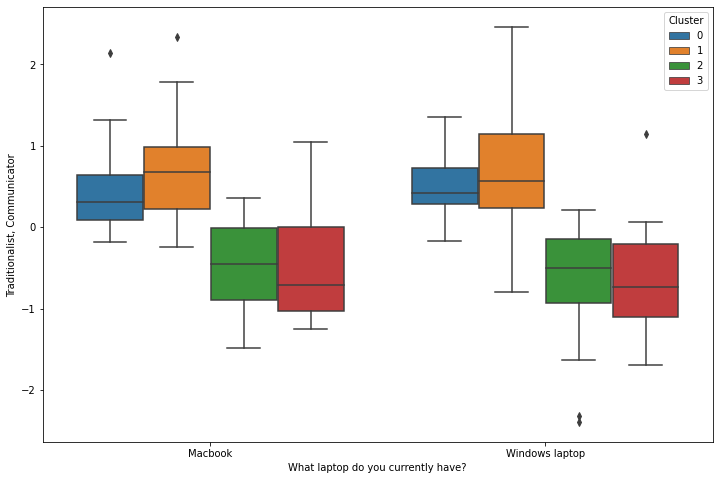

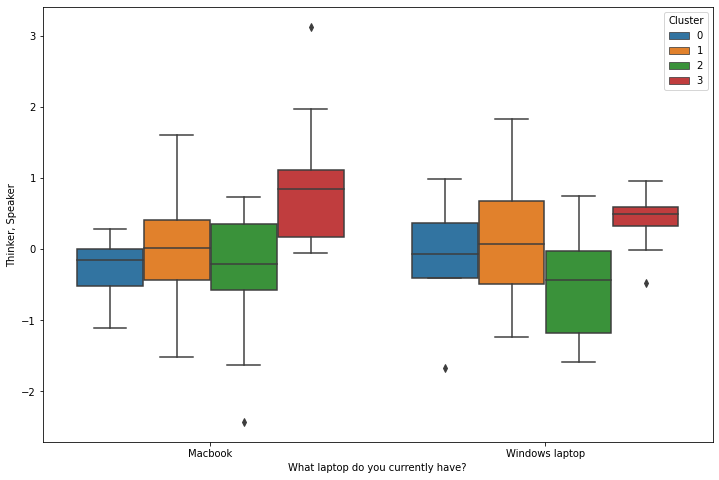

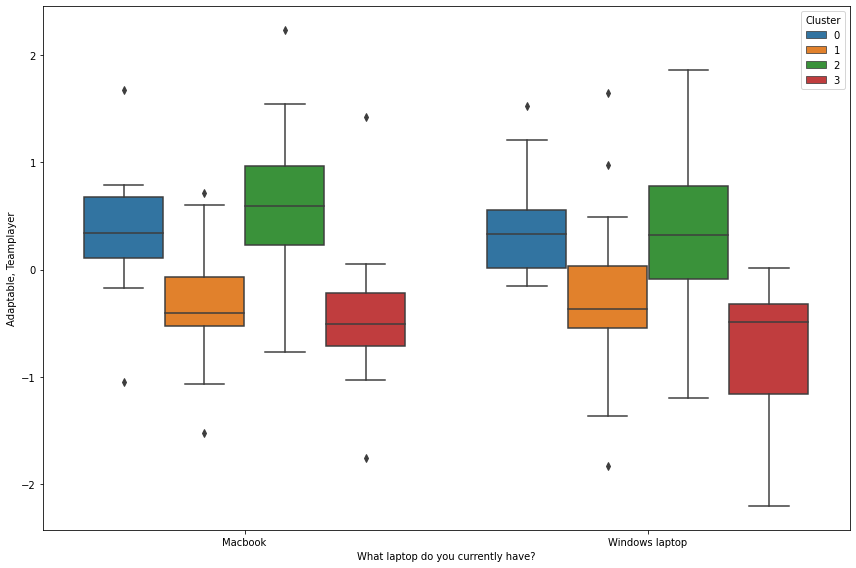

In [60]:
########################
# What laptop do you currently have?
########################

# Socially Challenged
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Socially Challenged',
            hue = 'Cluster',
            data = final_hult_clust)


                                
# Traditionalist, Passive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Traditionalist, Passive',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Communicator
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Traditionalist, Communicator',
            hue = 'Cluster',
            data = final_hult_clust)

# Thinker, Speaker
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Thinker, Speaker',
            hue = 'Cluster',
            data = final_hult_clust)

# Adaptable, Teamplayer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop do you currently have?',
            y = 'Adaptable, Teamplayer',
            hue = 'Cluster',
            data = final_hult_clust)

# formatting and displaying the plot
plt.tight_layout()
plt.show()



1- Cluster 0: Less-social and traditionalist individuals use windows-operated laptops more.

2- Cluster 3 & 4 : Thinkers and communicative individuals use Macbooks.

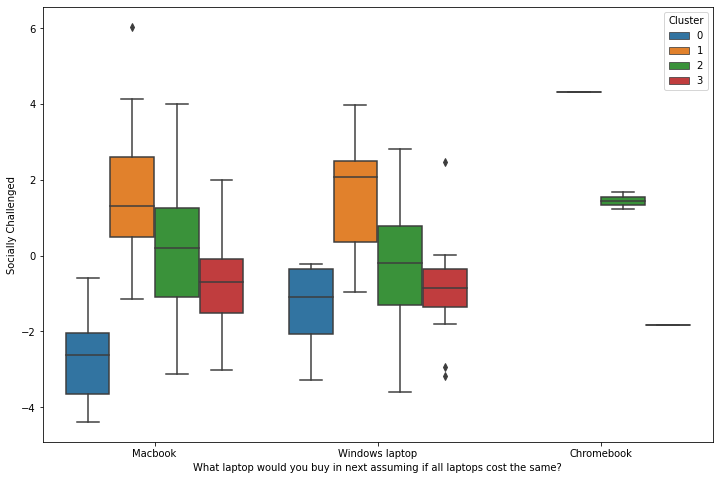

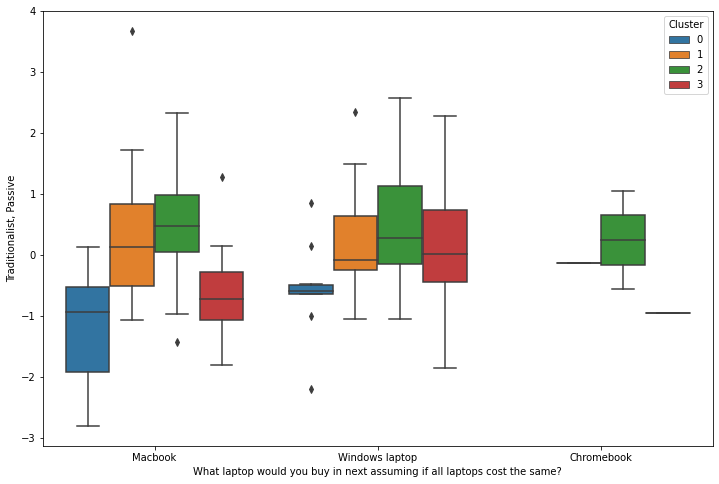

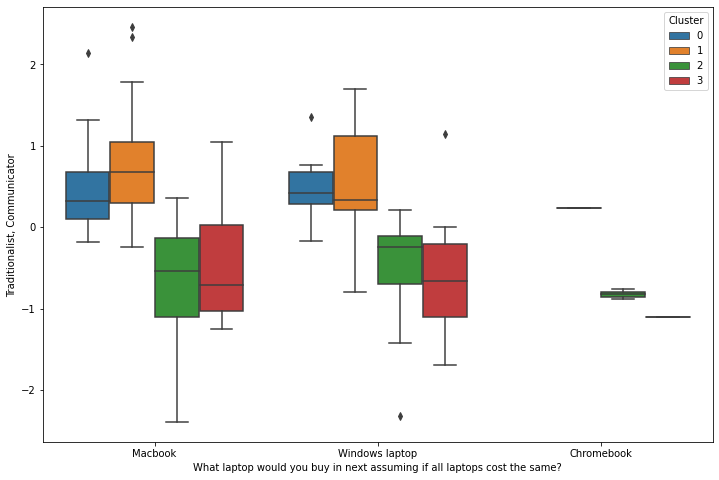

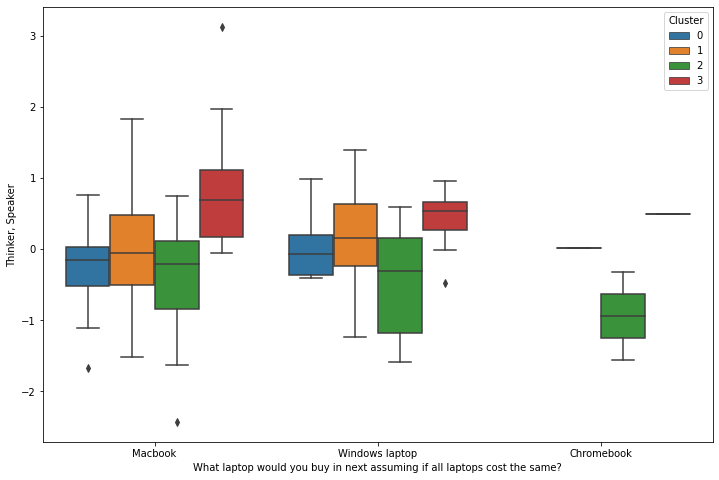

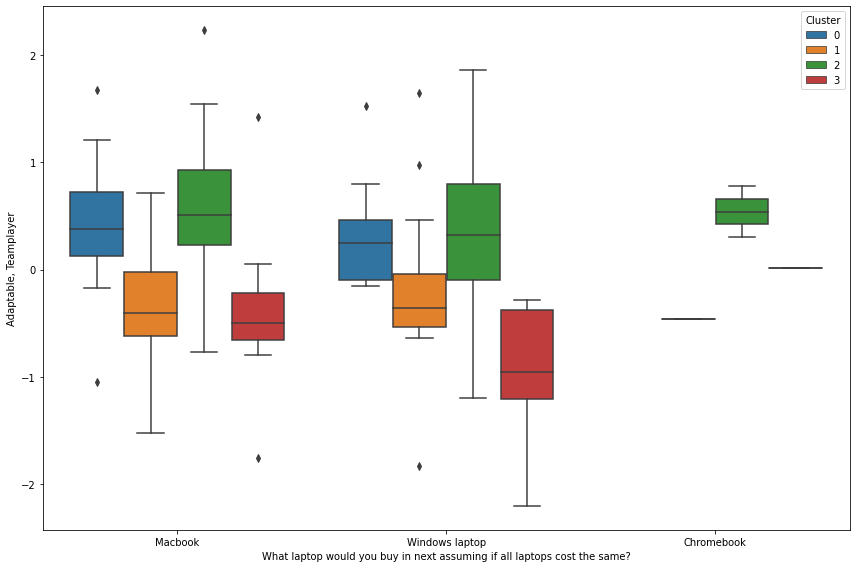

In [61]:
########################
# What laptop would you buy in next assuming if all laptops cost the same?
########################

# Socially Challenged
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Socially Challenged',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Passive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Traditionalist, Passive',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Communicator
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Traditionalist, Communicator',
            hue = 'Cluster',
            data = final_hult_clust)

# Thinker, Speaker
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Thinker, Speaker',
            hue = 'Cluster',
            data = final_hult_clust)


# Adaptable, Teamplayer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'What laptop would you buy in next assuming if all laptops cost the same?',
            y = 'Adaptable, Teamplayer',
            hue = 'Cluster',
            data = final_hult_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()

1- Cluster 0 & 4: Less-social and traditionalist inclined toward buying a PC as their next computer.

2- Cluster 3: Less-social individuals starting to consider Chromebooks.

3- Cluster 4 : Communicative individuals will keep using Macbooks.

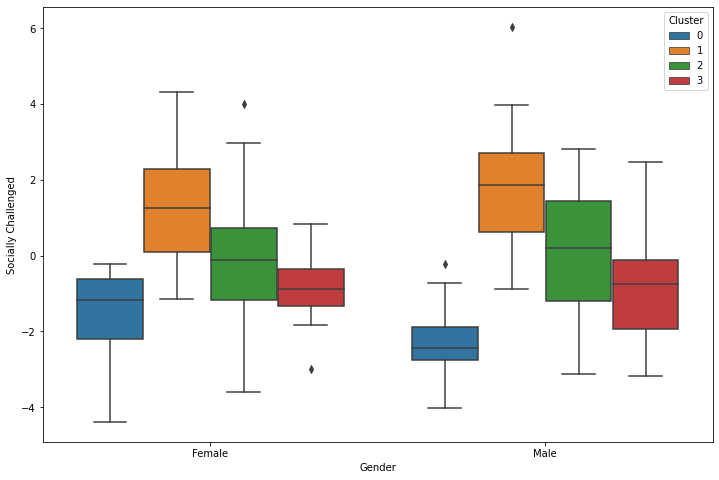

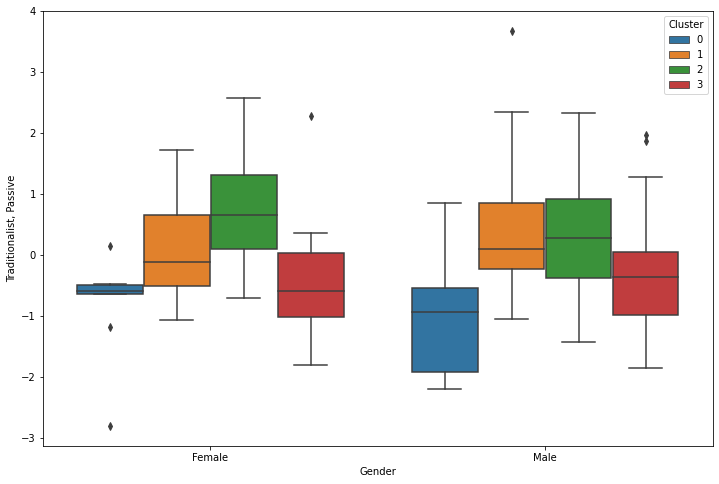

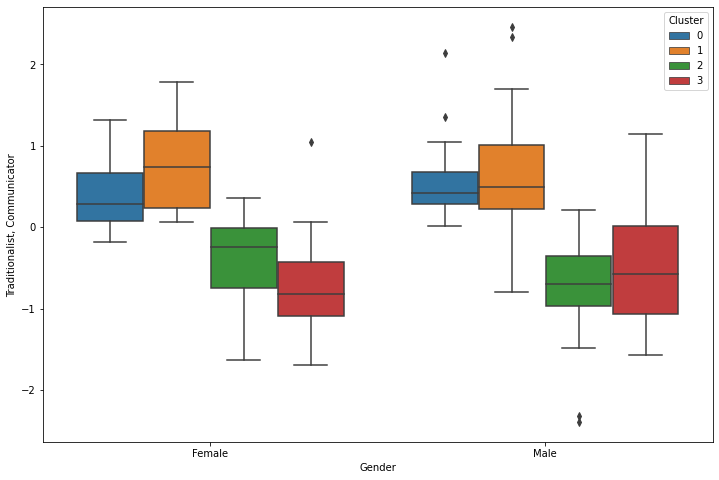

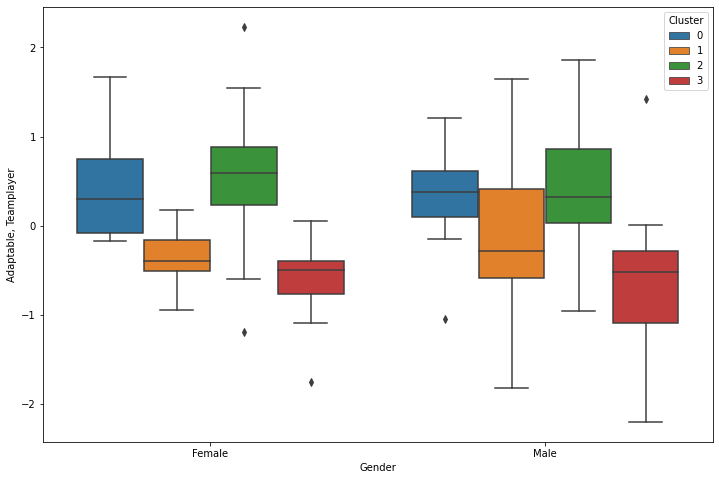

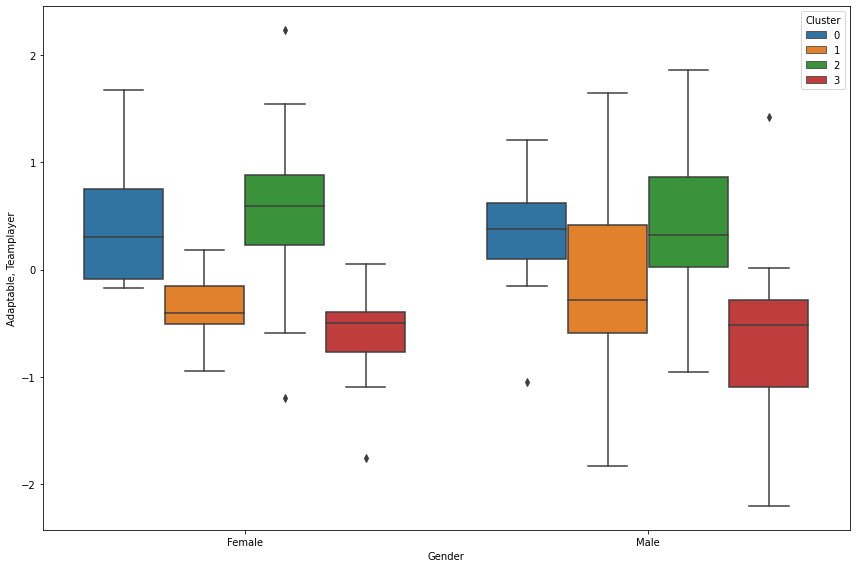

In [62]:
########################
# Gender
########################

# Socially Challenged
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Socially Challenged',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Passive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Traditionalist, Passive',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Communicator
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Traditionalist, Communicator',
            hue = 'Cluster',
            data = final_hult_clust)

# Adaptable, Teamplayer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Adaptable, Teamplayer',
            hue = 'Cluster',
            data = final_hult_clust)


# Adaptable, Teamplayer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Gender',
            y = 'Adaptable, Teamplayer',
            hue = 'Cluster',
            data = final_hult_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


1- Cluster 0: Less-social individuals are mostly female. Idea creators are mostly male.

2- Cluster 3: Traditionalist are more frequently female.

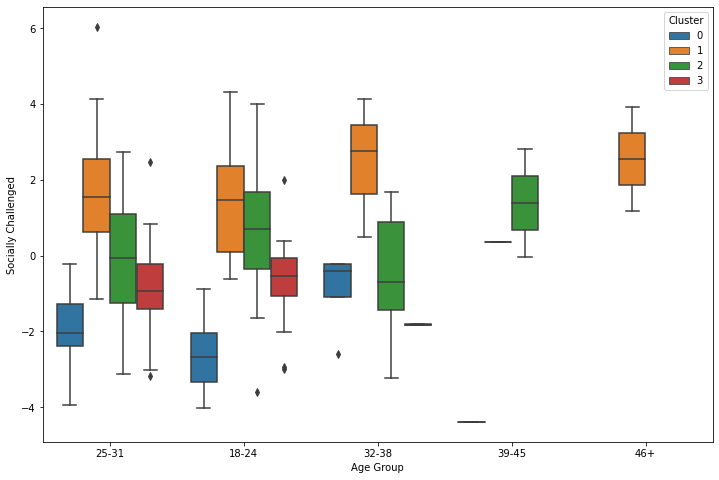

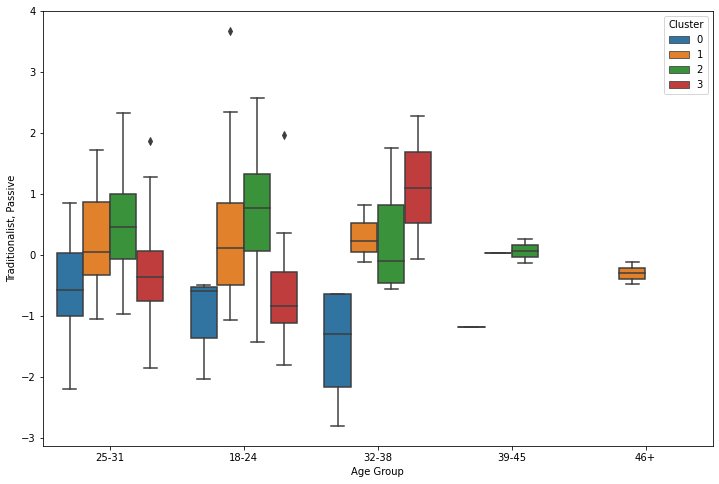

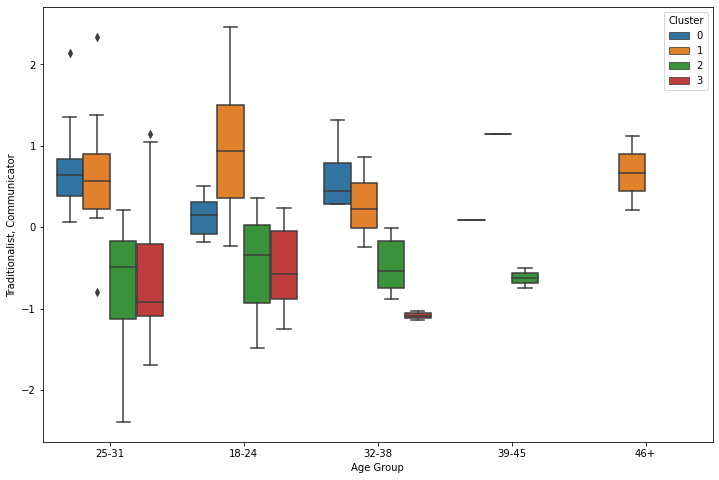

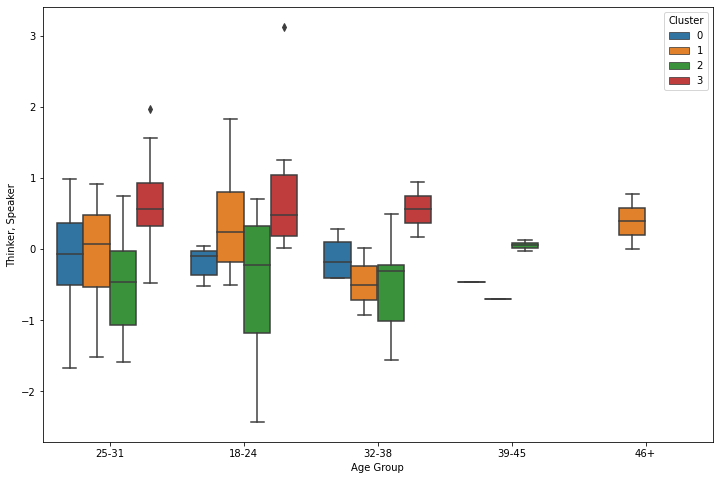

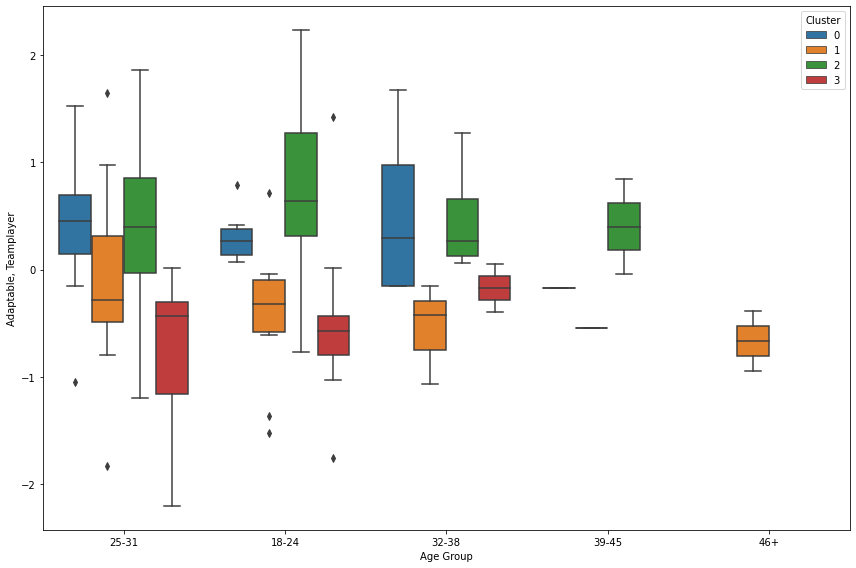

In [63]:
########################
# Age Group
########################

# Socially Challenged
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Socially Challenged',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Passive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Traditionalist, Passive',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Communicator
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Traditionalist, Communicator',
            hue = 'Cluster',
            data = final_hult_clust)

# Thinker, Speaker
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Thinker, Speaker',
            hue = 'Cluster',
            data = final_hult_clust)


# Adaptable, Teamplayer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age Group',
            y = 'Adaptable, Teamplayer',
            hue = 'Cluster',
            data = final_hult_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


1- Cluster 0: Less-social and traditionalist are more in 32-38 age range.

2- Cluster 1: Communicators are more in 18-24 age range.

3- Cluster 2: Less idea creators in 32-38 age range.

4- Cluster 3: More teamplayers in 32-38 age range.

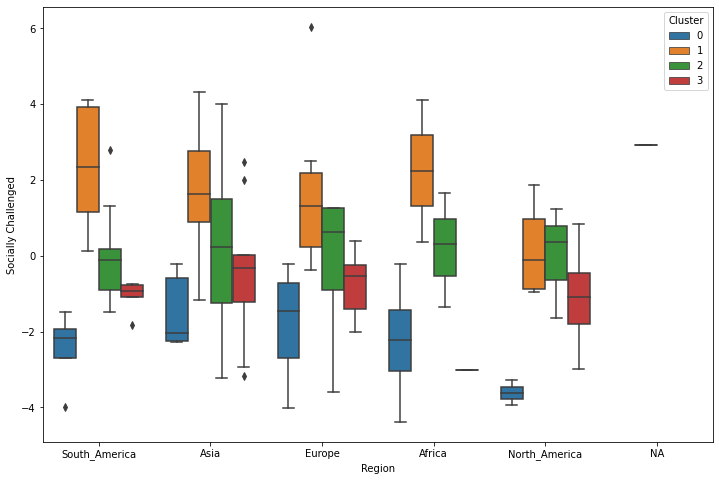

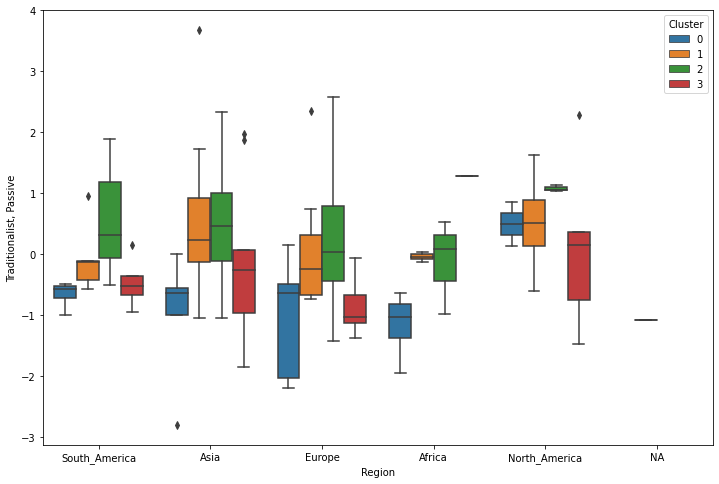

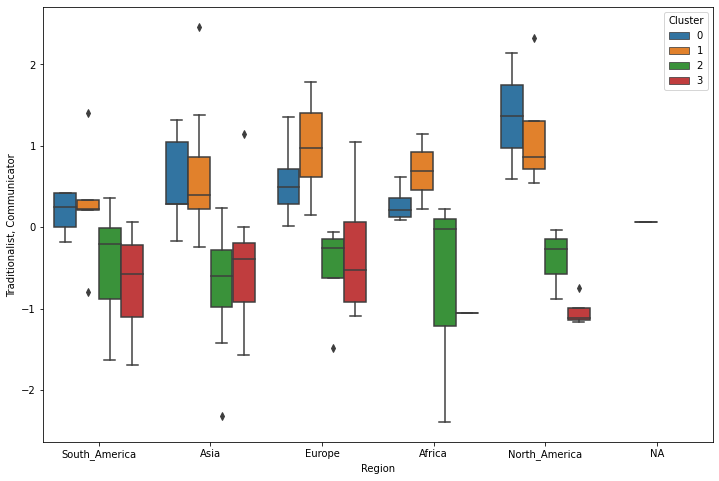

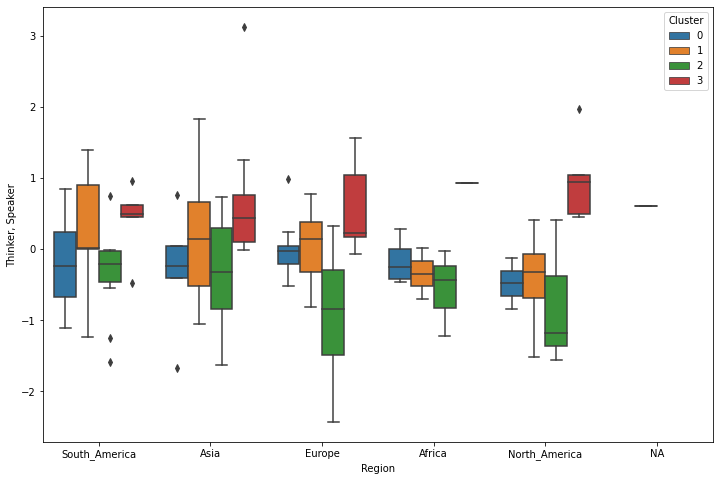

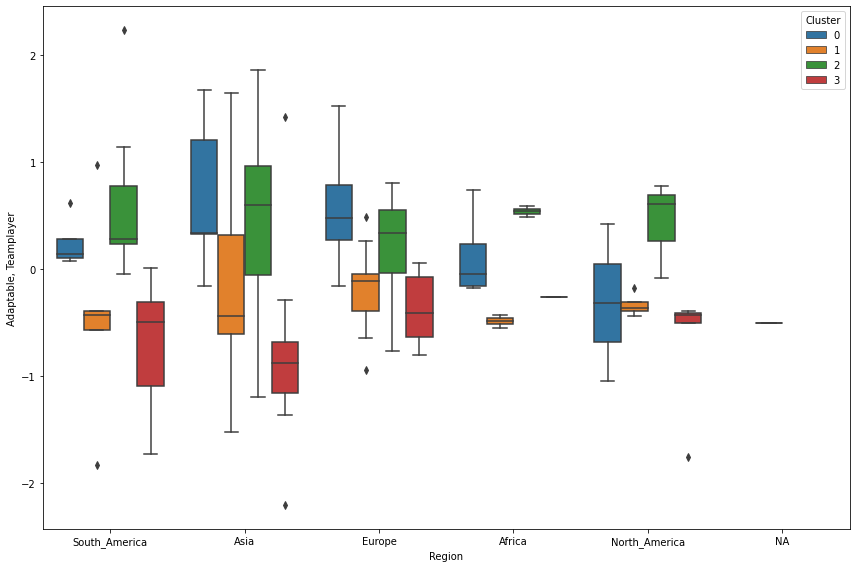

In [64]:
########################
# Region
########################

# Socially Challenged
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Socially Challenged',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Passive
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Traditionalist, Passive',
            hue = 'Cluster',
            data = final_hult_clust)



# Traditionalist, Communicator
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Traditionalist, Communicator',
            hue = 'Cluster',
            data = final_hult_clust)

# Thinker, Speaker
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Thinker, Speaker',
            hue = 'Cluster',
            data = final_hult_clust)


# Adaptable, Teamplayer
fig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Region',
            y = 'Adaptable, Teamplayer',
            hue = 'Cluster',
            data = final_hult_clust)


# formatting and displaying the plot
plt.tight_layout()
plt.show()


1- Cluster 0 & 1: Less-social and traditionalist individuals are seen less in North American region. Communicators are located more in North America. Adaptable teamplayers are more in Asia.

2- Cluster 2 & 3 : Traditionalist individuals are more in North American region.

3- Cluster 3: Thinker-idea creators are located less in Europe. Adaptable teamplayers are more in Europe.

<h1> Conclusion for Model 2: Hult DNA </h1>

## Cluster Identification

After aggregating the information gathered from demographic / persona analyses, clusters begin to display certain characteristics:

### a) Cluster 0:
This cluster houses less-social Windows-operated computer users who are planning to buy Windows-operated computers on their next purchase. These individuals are often aged between 32-38; thus, proto-GenY community. This group of people are mostly located outside of North America.

### b) Cluster 1:
This group is not coherent in their device choices; therefore, there is potential for all computer brands to obtain a part this market as their users. Some characteristics about this cluster are social, communicative individuals in North America and cooperative, team-players in Asia.

### c) Cluster 2:
This group also does not show a clear choice for computer usage. Significant population attributes are individuals who are routine workers, who do not engage in creative endeavors. They are usually between 32-38 age range and located in North America.

### d) Cluster 3:
This cluster is signified by thinkers and social individuals who prefer to use Macbooks and are planning to keep using Macbooks on their next purchase. One unique insight in this group is that, some individuals in these group are considering buying Chromebooks. Idea creators of this cluster are mostly located outside Europe. European individuals of this cluster are identified as team-players. 

### e) Cluster 4:
This cluster contains individuals who are basically inverse of Cluster 0. These individuals are loyal Macbook users. However, this group is not significant in any other characteristic.

# Possible Marketing Strategies for Hult Clusters

Marketing strategies revolve around two main objectives: capturing and retaining. New customers can be obtained from untapped market segments through successful aggressive marketing campaigns, identifying segment needs is crucial to get results. On the other hand; current Apple users should be categorized properly into their reasons of selecting the brand because these reasons become the central attributes of the brand identity. This information should be incorporated into the marketing strategy, so that the users are aware that the next-best choice is still Apple but now better. In summary, possible marketing strategies will be explored in two parts: expansion and retention.

The biggest untapped potential lies with Cluster 0. The population of this cluster are recorded as Xennials in the literature (Stollen, Marleen 2018). These individuals are classified as the generation who grew between analog and digital technologies. This group are distant from the social use of computers and are not digital natives (Garvey, Anna 2015). This 'offline' relation to computers creates a more fundamental pragmatic usage towards computers. It can be argued that these individuals will value raw machine power/performance over social classification or communicative features. A computer's use is either for work or a limited array of leisure activities: video-games, movies, music etc. To capture this audience, their needs of performance should be addressed. Macbook Pro is the better choice in this kind of marketing campaign due to its superior computational performance. Coupled with advertisements related to work environment and services like "Apple Arcade" can create valid incentives to ignite brand switches on the next purchase. A spill over effect can be seen for Cluster 2, these proposals can attract users from this group as well.

Apple has a strong user-base in Cluster 3 & 4. These individuals engage in creative endeavors and tend to be more social. It is highly likely that these individuals are digital natives, who use their devices everyday for both social and pragmatic needs. A Macbook is more visually attractive and easier to navigate than a Windows. It is streamlined performance minimizes bugs and errors; so that, people can easily use it for daily social media usage. It is also far more optimized for art/creativity related programs, with lighter chassis and more battery life enabling creative individuals to work anywhere, anytime. The most important point is the feeling of belonging to a group, any of the crowds which are cemented in the digital age (Holt, Douglas 2016). Displaying different social groups using Macbooks together would boost the social recognition notion, and trigger simultaneous purchasing urges for mentioned customer clusters. In this sense, Chromebook addresses similar pragmatic usages; thus, reinforcing social standing through branding is a stronger defensive option against the rise of Chromebook. 



# References

Networks. (n.d.). Retrieved from https://blogs.cornell.edu/info2040/2012/11/05/macs-for-the-win-for-college-students/


Davidson, B. (2020, May 7). 6 Advantages of Choosing The MacBook Pro. Tweak Your Biz. https://tweakyourbiz.com/technology/technology-trends/macbook-pro




Stollen, Marleen (10 January 2018). "There's a term for people born in the early 80's who don't feel like a millennial or Gen Xer". Business Insider.

Garvey, Anna (21 April 2015). "The Oregon Trail Generation: Life Before And After Mainstream Tech". Social Media Week.

Holt, Douglas (March 2016). "Branding in the Age of Social Media". Harvard Business Review. 
